https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results

# Initialize

In [ ]:
# import required libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
def check_col_values(df_col,drop_na=True):
  col_name = df_col.name
  counts = df_col.value_counts(dropna=drop_na)
  relative = df_col.value_counts(normalize=True,dropna=drop_na)
  df_counts = pd.DataFrame([counts,relative*100],index=['Count','Relative %']).transpose()
  print(f"Counts for {col_name}:\n{df_counts}")

In [ ]:
def sum_na_values(df):
  na_sum = df.isna().sum().sort_values(ascending=False)
  withNA = na_sum[na_sum > 0]
  # print("NA values per feature:\n",withNA,sep='')
  # print("NA values per feature:\n",withNA,sep='')
  return withNA

# Data cleaning and Prep

In [ ]:
# Import dataset
#### Make github project, to auto download the file ####
data = pd.read_csv('/content/Music_MentalHealth_Data.csv')
pd.set_option('display.max_columns', None)
data.head(10)

Timestamp   Age          Primary streaming service  Hours per day  \
0  8/27/2022 19:29:02  18.0                            Spotify            3.0   
1  8/27/2022 19:57:31  63.0                            Pandora            1.5   
2  8/27/2022 21:28:18  18.0                            Spotify            4.0   
3  8/27/2022 21:40:40  61.0                      YouTube Music            2.5   
4  8/27/2022 21:54:47  18.0                            Spotify            4.0   
5  8/27/2022 21:56:50  18.0                            Spotify            5.0   
6  8/27/2022 22:00:29  18.0                      YouTube Music            3.0   
7  8/27/2022 22:18:59  21.0                            Spotify            1.0   
8  8/27/2022 22:33:05  19.0                            Spotify            6.0   
9  8/27/2022 22:44:03  18.0  I do not use a streaming service.            1.0   

  While working Instrumentalist Composer         Fav genre Exploratory  \
0           Yes             Yes      Yes             Latin         Yes   
1           Yes              No       No              Rock         Yes   
2            No              No       No  Video game music          No   
3           Yes              No      Yes              Jazz         Yes   
4           Yes              No       No               R&B         Yes   
5           Yes             Yes      Yes              Jazz         Yes   
6           Yes             Yes       No  Video game music         Yes   
7           Yes              No       No             K pop         Yes   
8           Yes              No       No              Rock          No   
9           Yes              No       No               R&B         Yes   

  Foreign languages    BPM Frequency [Classical] Frequency [Country]  \
0               Yes  156.0                Rarely               Never   
1                No  119.0             Sometimes               Never   
2               Yes  132.0                 Never               Never   
3               Yes   84.0             Sometimes               Never   
4                No  107.0                 Never               Never   
5               Yes   86.0                Rarely           Sometimes   
6               Yes   66.0             Sometimes               Never   
7               Yes   95.0                 Never               Never   
8                No   94.0                 Never     Very frequently   
9               Yes  155.0                Rarely              Rarely   

   Frequency [EDM] Frequency [Folk] Frequency [Gospel] Frequency [Hip hop]  \
0           Rarely            Never              Never           Sometimes   
1            Never           Rarely          Sometimes              Rarely   
2  Very frequently            Never              Never              Rarely   
3            Never           Rarely          Sometimes               Never   
4           Rarely            Never             Rarely     Very frequently   
5            Never            Never              Never           Sometimes   
6           Rarely        Sometimes             Rarely              Rarely   
7           Rarely            Never              Never     Very frequently   
8            Never        Sometimes              Never               Never   
9           Rarely           Rarely          Sometimes              Rarely   

  Frequency [Jazz] Frequency [K pop] Frequency [Latin] Frequency [Lofi]  \
0            Never   Very frequently   Very frequently           Rarely   
1  Very frequently            Rarely         Sometimes           Rarely   
2           Rarely   Very frequently             Never        Sometimes   
3  Very frequently         Sometimes   Very frequently        Sometimes   
4            Never   Very frequently         Sometimes        Sometimes   
5  Very frequently   Very frequently            Rarely  Very frequently   
6        Sometimes             Never            Rarely           Rarely   
7           Rarely   Very frequently             Neve

In [ ]:
# Create a copy of the data to clean/work on
df_clean = data.copy()
df_clean.drop(columns=['Permissions','Timestamp'],inplace=True)
df_clean.dtypes

Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object
Frequency [Rock]                 object


In [ ]:
df_clean.head(5)

Age Primary streaming service  Hours per day While working  \
0  18.0                   Spotify            3.0           Yes   
1  63.0                   Pandora            1.5           Yes   
2  18.0                   Spotify            4.0            No   
3  61.0             YouTube Music            2.5           Yes   
4  18.0                   Spotify            4.0           Yes   

  Instrumentalist Composer         Fav genre Exploratory Foreign languages  \
0             Yes      Yes             Latin         Yes               Yes   
1              No       No              Rock         Yes                No   
2              No       No  Video game music          No               Yes   
3              No      Yes              Jazz         Yes               Yes   
4              No       No               R&B         Yes                No   

     BPM Frequency [Classical] Frequency [Country]  Frequency [EDM]  \
0  156.0                Rarely               Never           Rarely   
1  119.0             Sometimes               Never            Never   
2  132.0                 Never               Never  Very frequently   
3   84.0             Sometimes               Never            Never   
4  107.0                 Never               Never           Rarely   

  Frequency [Folk] Frequency [Gospel] Frequency [Hip hop] Frequency [Jazz]  \
0            Never              Never           Sometimes            Never   
1           Rarely          Sometimes              Rarely  Very frequently   
2            Never              Never              Rarely           Rarely   
3           Rarely          Sometimes               Never  Very frequently   
4            Never             Rarely     Very frequently            Never   

  Frequency [K pop] Frequency [Latin] Frequency [Lofi] Frequency [Metal]  \
0   Very frequently   Very frequently           Rarely             Never   
1            Rarely         Sometimes           Rarely             Never   
2   Very frequently             Never        Sometimes         Sometimes   
3         Sometimes   Very frequently        Sometimes             Never   
4   Very frequently         Sometimes        Sometimes             Never   

   Frequency [Pop]  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0  Very frequently        Sometimes  Very frequently            Never   
1        Sometimes        Sometimes           Rarely  Very frequently   
2           Rarely            Never           Rarely           Rarely   
3        Sometimes        Sometimes            Never            Never   
4        Sometimes  Very frequently  Very frequently            Never   

  Frequency [Video game music]  Anxiety  Depression  Insomnia  OCD  \
0                    Sometimes      3.0         0.0       1.0  0.0   
1                       Rarely      7.0         2.0       2.0  1.0   
2              Very frequently      7.0         7.0      10.0  2.0   
3                        Never      9.0         7.0       3.0  3.0   
4                       Rarely      7.0         2.0       5.0  9.0   

  Music effects  
0           NaN  
1           NaN  
2     No effect  
3       Improve  
4       Improve

In [ ]:
# Check Counts and Relative Frequency of Values for a feature
check_col_values(df_clean['Music effects'])

Counts for Music effects:
           Count  Relative %
Improve    542.0   74.450549
No effect  169.0   23.214286
Worsen      17.0    2.335165


Checking distribution of Music Effects
* Distribution is very skewed towards Improve
* No Effect and Worsen can be combined into Not Improved to mitigate some of this

In [ ]:
# @title
# Will need to keep in mind heavy skew towards Improve (73.64%) comapred to No effect (22.96%) , Worsen (2.31%) & NaN(To be replaced) (1.09%)
### May consider binning No effect & Worsen to reduce the skew, would be treated as "Improved vs Not Improved"
### Replaced by method check_col_values()
# # Check music effect counts
# print(df_clean['Music effects'].unique())

# # Display counts
# df_clean['Music effects'].value_counts(dropna=False)

# # Display relative frequency
# df_clean['Music effects'].value_counts(dropna=False,normalize=True)*100

**Instrumentalist**
* Does the respondent play an instrument regularly?

**Composer**
* Does the respondent compose music?

**Exploratory**
* Does the respondent actively explore new artists/genres?

**Foreign languages**
* Does the respondent regularly listen to music with lyrics in a language they are not fluent in?

**Music effects**
* Does music improve/worsen respondent's mental health conditions?

**Frequency**
* 0 = Never | 10 = Constant or Extreme

**BPM**
* Beats per minute of favorite genre

In [ ]:
# https://stackoverflow.com/a/32589877
# This gets the columns containing the word 'Frequency' and get the count of the unqiue values
df_clean[[c for c in df_clean.columns if 'Frequency' in c]].apply(pd.Series.value_counts)

# This confirms there are only 4 unique values between the columns
# Making these great candidates for categorical data types

Frequency [Classical]  Frequency [Country]  Frequency [EDM]  \
Never                              169                  343              307   
Rarely                             259                  233              194   
Sometimes                          200                  111              146   
Very frequently                    108                   49               89   

                 Frequency [Folk]  Frequency [Gospel]  Frequency [Hip hop]  \
Never                         292                 535                  181   
Rarely                        221                 135                  214   
Sometimes                     145                  52                  218   
Very frequently                78                  14                  123   

                 Frequency [Jazz]  Frequency [K pop]  Frequency [Latin]  \
Never                         261                416                443   
Rarely                        247                176                172   
Sometimes                     175                 67                 88   
Very frequently                53                 77                 33   

                 Frequency [Lofi]  Frequency [Metal]  Frequency [Pop]  \
Never                         280                264               56   
Rarely                        211                192              142   
Sometimes                     160                134              261   
Very frequently                85                146              277   

                 Frequency [R&B]  Frequency [Rap]  Frequency [Rock]  \
Never                        225              200                91   
Rarely                       211              215                96   
Sometimes                    184              195               219   
Very frequently              116              126               330   

                 Frequency [Video game music]  
Never                                     236  
Rarely                                    197  
Sometimes                                 186  
Very frequently                           117

In [ ]:
# Frequency should be converted from categorical to an ordinal numeric structure
# Should atleast be converted to Categorical with an order

# Get frequency columns
frequencyCols = [c for c in df_clean.columns if 'Frequency' in c]

# Ordinal numeric mappings for frequency
frequency_mapping = {'Never':0,'Rarely':1,'Sometimes':2,'Very frequently':3}

# Create frequency category
frequency_category = pd.CategoricalDtype(categories=frequency_mapping,ordered=True)


In [ ]:
# Convert Frequency columns to categorical
for col in frequencyCols:
  df_clean[col] = df_clean[col].astype(frequency_category)
df_clean.dtypes

Age                              float64
Primary streaming service         object
Hours per day                    float64
While working                     object
Instrumentalist                   object
Composer                          object
Fav genre                         object
Exploratory                       object
Foreign languages                 object
BPM                              float64
Frequency [Classical]           category
Frequency [Country]             category
Frequency [EDM]                 category
Frequency [Folk]                category
Frequency [Gospel]              category
Frequency [Hip hop]             category
Frequency [Jazz]                category
Frequency [K pop]               category
Frequency [Latin]               category
Frequency [Lofi]                category
Frequency [Metal]               category
Frequency [Pop]                 category
Frequency [R&B]                 category
Frequency [Rap]                 category
Frequency [Rock]

In [ ]:
# Use function to get all NA's and sum amount per column
# Save all columns with NAs
na_list = sum_na_values(df_clean)
print("NA values per feature:\n",na_list,sep='')

NA values per feature:
BPM                          107
Music effects                  8
Foreign languages              4
Instrumentalist                4
While working                  3
Primary streaming service      1
Age                            1
Composer                       1
dtype: int64


In [ ]:
# BPM has 107 NA values
# Create dataset with all NA BPM values for analysis
# BPM is tied to Fav Genre
naBPM = df_clean[df_clean['BPM'].isna()]
naBPM['Fav genre'].value_counts()

Rock                37
Pop                 17
Classical           13
Metal               10
Video game music     7
R&B                  5
Country              4
Folk                 4
Hip hop              3
Gospel               2
Rap                  2
Jazz                 1
EDM                  1
K pop                1
Name: Fav genre, dtype: int64

In [ ]:
## Check cleaned data
display(df_clean.describe())
max_BPM = df_clean['BPM'].max()

Age  Hours per day           BPM     Anxiety  Depression  \
count  735.000000     736.000000  6.290000e+02  736.000000  736.000000   
mean    25.206803       3.572758  1.589948e+06    5.837636    4.796196   
std     12.054970       3.028199  3.987261e+07    2.793054    3.028870   
min     10.000000       0.000000  0.000000e+00    0.000000    0.000000   
25%     18.000000       2.000000  1.000000e+02    4.000000    2.000000   
50%     21.000000       3.000000  1.200000e+02    6.000000    5.000000   
75%     28.000000       5.000000  1.440000e+02    8.000000    7.000000   
max     89.000000      24.000000  1.000000e+09   10.000000   10.000000   

         Insomnia         OCD  
count  736.000000  736.000000  
mean     3.738451    2.637228  
std      3.088689    2.842017  
min      0.000000    0.000000  
25%      1.000000    0.000000  
50%      3.000000    2.000000  
75%      6.000000    5.000000  
max     10.000000   10.000000

BPM of 999,999,999 is a global outlier and this entry will be removed before other cleaning steps</br>


In [ ]:
## BPM max is 999,999,999 this row should be removed as this value is so extreme
## The rest of the input should be considered as invalid

# Remove row with max BPM
df_clean = df_clean[df_clean['BPM'] != max_BPM].reset_index(drop=True)
df_clean.describe()

Age  Hours per day         BPM     Anxiety  Depression  \
count  734.000000     735.000000  628.000000  735.000000  735.000000   
mean    25.219346       3.568095  123.423567    5.840136    4.791837   
std     12.058389       3.027616   39.345307    2.794132    3.028622   
min     10.000000       0.000000    0.000000    0.000000    0.000000   
25%     18.000000       2.000000  100.000000    4.000000    2.000000   
50%     21.000000       3.000000  120.000000    6.000000    5.000000   
75%     28.000000       5.000000  144.000000    8.000000    7.000000   
max     89.000000      24.000000  624.000000   10.000000   10.000000   

         Insomnia         OCD  
count  735.000000  735.000000  
mean     3.732653    2.635374  
std      3.086782    2.843507  
min      0.000000    0.000000  
25%      1.000000    0.000000  
50%      3.000000    2.000000  
75%      6.000000    5.000000  
max     10.000000   10.000000

## Outlier Detection

In [ ]:
df_out = df_clean.copy()
# desc = df_out.describe()['BPM']
check_cols = ['BPM','Hours per day']

start_count = df_out.shape[0]
# print('Entries Before Removal:',start_count)

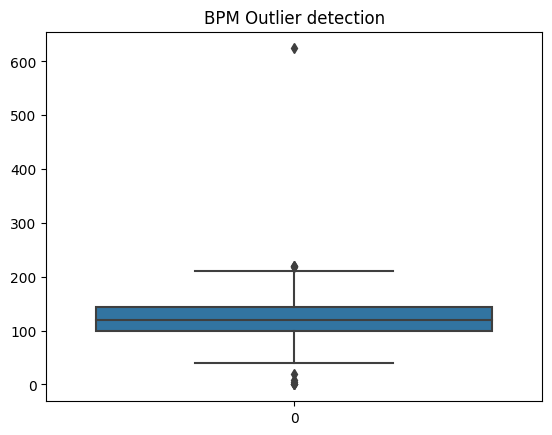

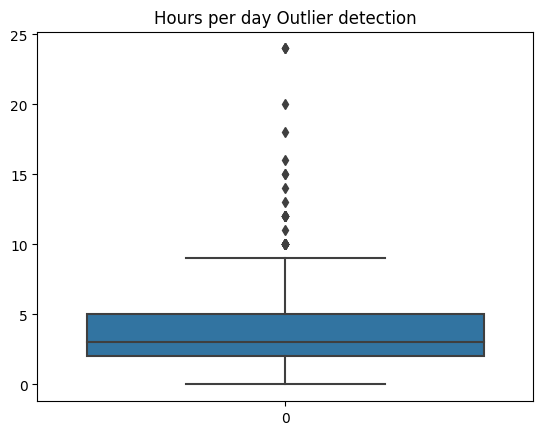

In [ ]:
for col in check_cols:
  sns.boxplot(df_out[col])
  plt.title(f'{col} Outlier detection')
  plt.show()

In [ ]:
# Use Z-score for Outlier detection
# A calculation of Standard Deviation and mean. This implementation can also ignore NA's
import numpy as np
from scipy import stats

df_z = df_out.copy()
z_counts = []

thresh = 3

z_bpm = np.abs(stats.zscore(df_out['BPM'],nan_policy='omit'))
z_hpd = np.abs(stats.zscore(df_out['Hours per day'],nan_policy='omit'))

bpm_out = df_out.loc[np.where(z_bpm > thresh)[0],'BPM'].unique()
hpd_out = df_out.loc[np.where(z_hpd > thresh)[0],'Hours per day'].unique()

df_z = df_z.loc[(~df_z['BPM'].isin(bpm_out)) & (~df_z['Hours per day'].isin(hpd_out))]

z_count = df_z.shape[0]
print('Entries After Z-score:',z_count)

Entries After Z-score: 720


In [ ]:
## IQR
df_IQR = df_out.copy()
iqr_counts = []

for col in check_cols:
  desc = df_out.describe()[col]

  Q1 = desc['25%']
  Q3 = desc['75%']
  IQR = (Q3 - Q1) * 1.5

  # Bounds
  upper = Q3 + IQR
  lower = Q1 - IQR

  # Check values
  print(f'{col} High Values:')
  print(list(df_out.loc[df_out[col] >= upper,col].unique()),'\n')
  # display(df_out.loc[df_out[col] >= upper])

  print(f'{col} Low Values:')
  print(list(df_out.loc[df_out[col] <= lower,col].unique()),'\n')
  df_IQR = df_IQR.loc[(df_out[col] >= lower) & (df_out[col] <= upper)]

iqr_count = df_IQR.shape[0]

BPM High Values:
[220.0, 210.0, 624.0, 218.0] 

BPM Low Values:
[0.0, 20.0, 4.0, 8.0] 

Hours per day High Values:
[12.0, 24.0, 10.0, 20.0, 16.0, 15.0, 14.0, 13.0, 11.0, 18.0] 

Hours per day Low Values:
[] 



In [ ]:
# Standard Deviation
df_sdev = df_out.copy()
sdev_counts = []

print('Entries Before SDev:',df_sdev.shape[0])

for col in check_cols:
  desc = df_out.describe()[col]

  sdev, mean = desc['std'], desc['mean']

  upper_bound = mean + sdev*3
  lower_bound = mean - sdev*3

  print(col,'High Values:',list(df_out.loc[df_out[col] >= upper_bound,col].unique()),'\n')
  print(col,'Low Values:',list(df_out.loc[df_out[col] <= lower_bound,col].unique()))

  # Identifies the proper outliers
  print(col,'Upper Bound:', upper_bound, ' |',col,'Lower Bound:', lower_bound,'\n')

  df_sdev = df_sdev.loc[(df_out[col] <= upper_bound) & (df_out[col] >= lower_bound) ]

sdev_count = df_sdev.shape[0]

Entries Before SDev: 735
BPM High Values: [624.0] 

BPM Low Values: [0.0, 4.0]
BPM Upper Bound: 241.4594869983403  | BPM Lower Bound: 5.387646759621475 

Hours per day High Values: [24.0, 20.0, 16.0, 15.0, 14.0, 13.0, 18.0] 

Hours per day Low Values: []
Hours per day Upper Bound: 12.650942353214003  | Hours per day Lower Bound: -5.514751877023525 



In [ ]:
print('Entries Before Outlier Detection: ',start_count,'\n','='*30,sep='')
print('Entries After Z-score:',z_count)
print('Entries After SDev:',sdev_count)
print('Entries After IQR:',iqr_count)

Entries Before Outlier Detection: 735
Entries After Z-score: 720
Entries After SDev: 614
Entries After IQR: 580


Different Outlier detection/removal methods
* Z-score while omitting NA values and using absolute values was used to remove both high and low outliers while ignoring NA values
* IQR removes large chunks of the data inlcuding NAs
* Using mean and standard deviation removes too many values including NAs

In [ ]:
# Z-score outlier removal keeps the most valid information
df_clean = df_z.copy()
df_clean.shape[0]

720

## Data Imputation

In [ ]:
# Replace NaN with mean per genre
na_genres = list(naBPM['Fav genre'].unique())
for genre in na_genres:
  clean_mean = df_clean.loc[df_clean['Fav genre']==genre]['BPM'].mean()
  # df_clean.loc[(df_clean['Fav genre']==genre) & (df_clean['BPM'].isna() | (df_clean['BPM'] >= upper_bound) | (df_clean['BPM'] <= lower_bound)),'BPM'] = clean_mean
  df_clean.loc[(df_clean['Fav genre']==genre) & (df_clean['BPM'].isna()),'BPM'] = clean_mean

In [ ]:
# @title
# # Check mean BPM per genre
# for genre in df_clean['Fav genre'].unique():
#   print(f"Average {genre.replace(' ','-',1).split(' ')[0]} BPM:\t{df_clean[df_clean['Fav genre']==genre]['BPM'].mean()}")

In [ ]:
# @title
# temp_df = df_clean.copy()
# # temp_df.loc[(df["pos"] == "GK") & (df["goals"].isnull()), 'goals'].fillna(0, inplace=True)
# # temp_df['BPM'] = temp_df.loc[temp_df['Fav genre']==genre]['BPM'].fillna(clean_mean)
# # temp_df[temp_df['Fav genre']==genre]
# # temp_df[temp_df['Fav genre']==genre].loc[:,['BPM']].fillna(clean_mean,inplace=True)
#****** clean_mean = df_clean.loc[df_clean['Fav genre']==genre]['BPM'].mean()
#****** temp_df.loc[(temp_df['Fav genre']=='Gospel') & (temp_df['BPM'].isna()),'BPM'] = clean_mean

In [ ]:
# @title
# # Replace NaN with mean per genre
# for genre in naBPM['Fav genre'].unique():
#   clean_mean = df_clean.loc[df_clean['Fav genre']==genre]['BPM'].mean()
#   df_clean.loc[(df_clean['Fav genre']==genre) & (df_clean['BPM'].isna()),'BPM'] = clean_mean

In [ ]:
# @title
# # Check mean BPM per genre
# for genre in df_clean['Fav genre'].unique():
#   print(f"Average {genre.replace(' ','-',1).split(' ')[0]} BPM:\t{df_clean[df_clean['Fav genre']==genre]['BPM'].mean()}")
#   print(f"AvgFill {genre.replace(' ','-',1).split(' ')[0]} BPM:\t{temp_df[temp_df['Fav genre']==genre]['BPM'].mean()}")
#   print('='*25)

In [ ]:
print(sum_na_values(df_clean))
# Fill missing Music effects with most sparse value
df_clean['Music effects'].fillna(df_clean['Music effects'].value_counts().index[-1],inplace=True)
df_clean['Music effects'] = df_clean['Music effects'].astype(pd.CategoricalDtype(categories=df_clean['Music effects'].unique()))

# Create Improved Column
df_clean['Improved'] = df_clean['Music effects'].map({'No effect':0,'Improve':1,'Worsen':0}).fillna(0).astype('int64')
print('\n',sum_na_values(df_clean),sep='')

Music effects                8
Foreign languages            4
Instrumentalist              4
While working                2
Primary streaming service    1
Age                          1
Composer                     1
dtype: int64

Instrumentalist              4
Foreign languages            4
While working                2
Age                          1
Primary streaming service    1
Composer                     1
dtype: int64


In [ ]:
# # With limited NA values filling with mean/mode is good for a first pass
# # Since I was not able to determine a strong correlation with other values
# na_list = sum_na_values(df_clean)
for col in na_list.index:
  if df_clean[col].dtype == 'float64': df_clean[col].fillna(df_clean[col].mean())#; pass
  df_clean[col].fillna(df_clean[col].mode()[0],inplace=True)

print(sum_na_values(df_clean))

Series([], dtype: int64)


In [ ]:
# Create Fav Genre Frequency Col
for genre in df_clean['Fav genre'].unique():
  df_clean.loc[df_clean['Fav genre'] == genre,'Fav genre Frequency'] = df_clean.loc[df_clean['Fav genre'] == genre,f'Frequency [{genre}]']
  # print(genre,':',df_clean.loc[(df_clean['Fav genre'] == genre) & (df_clean['Fav genre Frequency'] != df_clean[f'Frequency [{genre}]'])].shape[0])

In [ ]:
# Reset index at the end of data cleaning
df_clean.reset_index(drop=True,inplace=True)

## Data Encoding

In [ ]:
# Check values for object columns
yn_cols = []
for col in df_clean.select_dtypes('object'):
  vals = df_clean[col].unique()
  if 'Yes' in vals and 'No' in vals:
    yn_cols += [col]

# Convert Yes/No to categorical
for col in yn_cols:
  df_clean[col] = df_clean[col].astype(pd.CategoricalDtype(categories={'Yes':1,'No':0}))
  check_col_values(df_clean[col])

Counts for While working:
     Count  Relative %
Yes  569.0   79.027778
No   151.0   20.972222
Counts for Instrumentalist:
     Count  Relative %
No   489.0   67.916667
Yes  231.0   32.083333
Counts for Composer:
     Count  Relative %
No   598.0   83.055556
Yes  122.0   16.944444
Counts for Exploratory:
     Count  Relative %
Yes  512.0   71.111111
No   208.0   28.888889
Counts for Foreign languages:
     Count  Relative %
Yes  400.0   55.555556
No   320.0   44.444444


* Yes/No Columns
  * While Working
  * Instrumentalist
  * Composer
  * Exploratory
  * Foreign Languages

In [ ]:
# Primary Streaming Service values
streaming_category = pd.CategoricalDtype(categories=list(df_clean['Primary streaming service'].unique()))
df_clean['Primary streaming service'] = df_clean['Primary streaming service'].astype(streaming_category)

# # Genre values
genre_category = pd.CategoricalDtype(categories=list(df_clean['Fav genre'].unique()))
df_clean['Fav genre'] = df_clean['Fav genre'].astype(genre_category)

In [ ]:
df_clean.dtypes

Age                              float64
Primary streaming service       category
Hours per day                    float64
While working                   category
Instrumentalist                 category
Composer                        category
Fav genre                       category
Exploratory                     category
Foreign languages               category
BPM                              float64
Frequency [Classical]           category
Frequency [Country]             category
Frequency [EDM]                 category
Frequency [Folk]                category
Frequency [Gospel]              category
Frequency [Hip hop]             category
Frequency [Jazz]                category
Frequency [K pop]               category
Frequency [Latin]               category
Frequency [Lofi]                category
Frequency [Metal]               category
Frequency [Pop]                 category
Frequency [R&B]                 category
Frequency [Rap]                 category
Frequency [Rock]

In [ ]:
# Create Encoded Dataset
df_encoded = df_clean.copy()

for col in df_encoded.select_dtypes('category'):
  df_encoded[col] = df_encoded[col].cat.codes

df_encoded.dtypes

Age                             float64
Primary streaming service          int8
Hours per day                   float64
While working                      int8
Instrumentalist                    int8
Composer                           int8
Fav genre                          int8
Exploratory                        int8
Foreign languages                  int8
BPM                             float64
Frequency [Classical]              int8
Frequency [Country]                int8
Frequency [EDM]                    int8
Frequency [Folk]                   int8
Frequency [Gospel]                 int8
Frequency [Hip hop]                int8
Frequency [Jazz]                   int8
Frequency [K pop]                  int8
Frequency [Latin]                  int8
Frequency [Lofi]                   int8
Frequency [Metal]                  int8
Frequency [Pop]                    int8
Frequency [R&B]                    int8
Frequency [Rap]                    int8
Frequency [Rock]                   int8


In [ ]:
# Merge Frequency per Row into total
# Frequency values are encoded with: {'Never':0,'Rarely':1,'Sometimes':2,'Very frequently':3}
merge_freq = df_encoded.copy().drop(columns=frequencyCols)
merge_freq['Total_Frequency'] = df_encoded[frequencyCols].sum(axis=1)

In [ ]:
# Get Dummies Just make the name the Value i.e ['Never','Rarely'...], merge cols with same name
# Sum values of frequency per row since Dummies generates 64 additional columns
# Sum Column values, could get percentile as well
df_freqsum = pd.get_dummies(df_clean[frequencyCols],prefix='',prefix_sep='')
df_freq_sum = df_freqsum.groupby(df_freqsum.columns, axis=1).sum()

In [ ]:
df_freq_sum.columns

Index(['Never', 'Rarely', 'Sometimes', 'Very frequently'], dtype='object')

In [ ]:
df_clean['Total_Frequency'] = merge_freq['Total_Frequency']
df_encoded['Total_Frequency'] = merge_freq['Total_Frequency']

## Create Columns to count # of Never, Rarely, Sometimes, Very Frequently
df_clean[df_freq_sum.columns] = df_freq_sum
df_encoded[df_freq_sum.columns] = df_freq_sum

# Data Visualizations & Analysis

In [ ]:
plt.rcParams.update(matplotlib.rcParamsDefault)

<ipython-input-117-6b92664ae567>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', linewidths=0.5,vmin=-1)


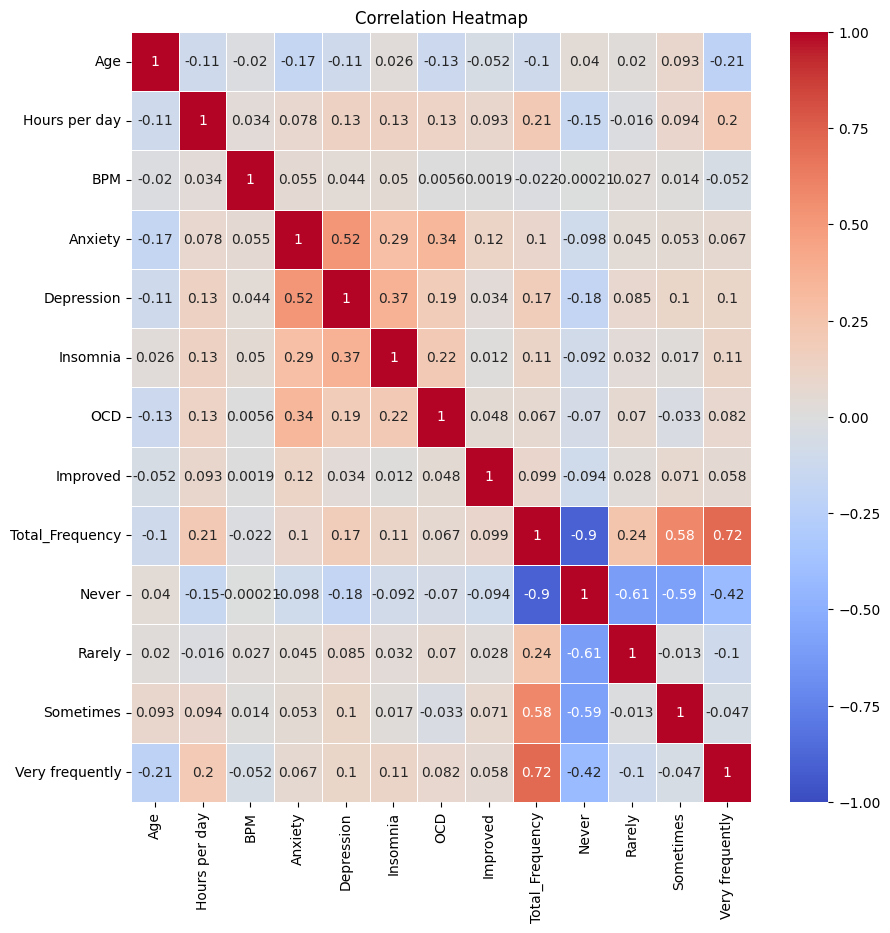

In [ ]:
# Correlation of df_clean
plt.figure(figsize=(10, 10))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', linewidths=0.5,vmin=-1)
plt.title('Correlation Heatmap')
plt.show()

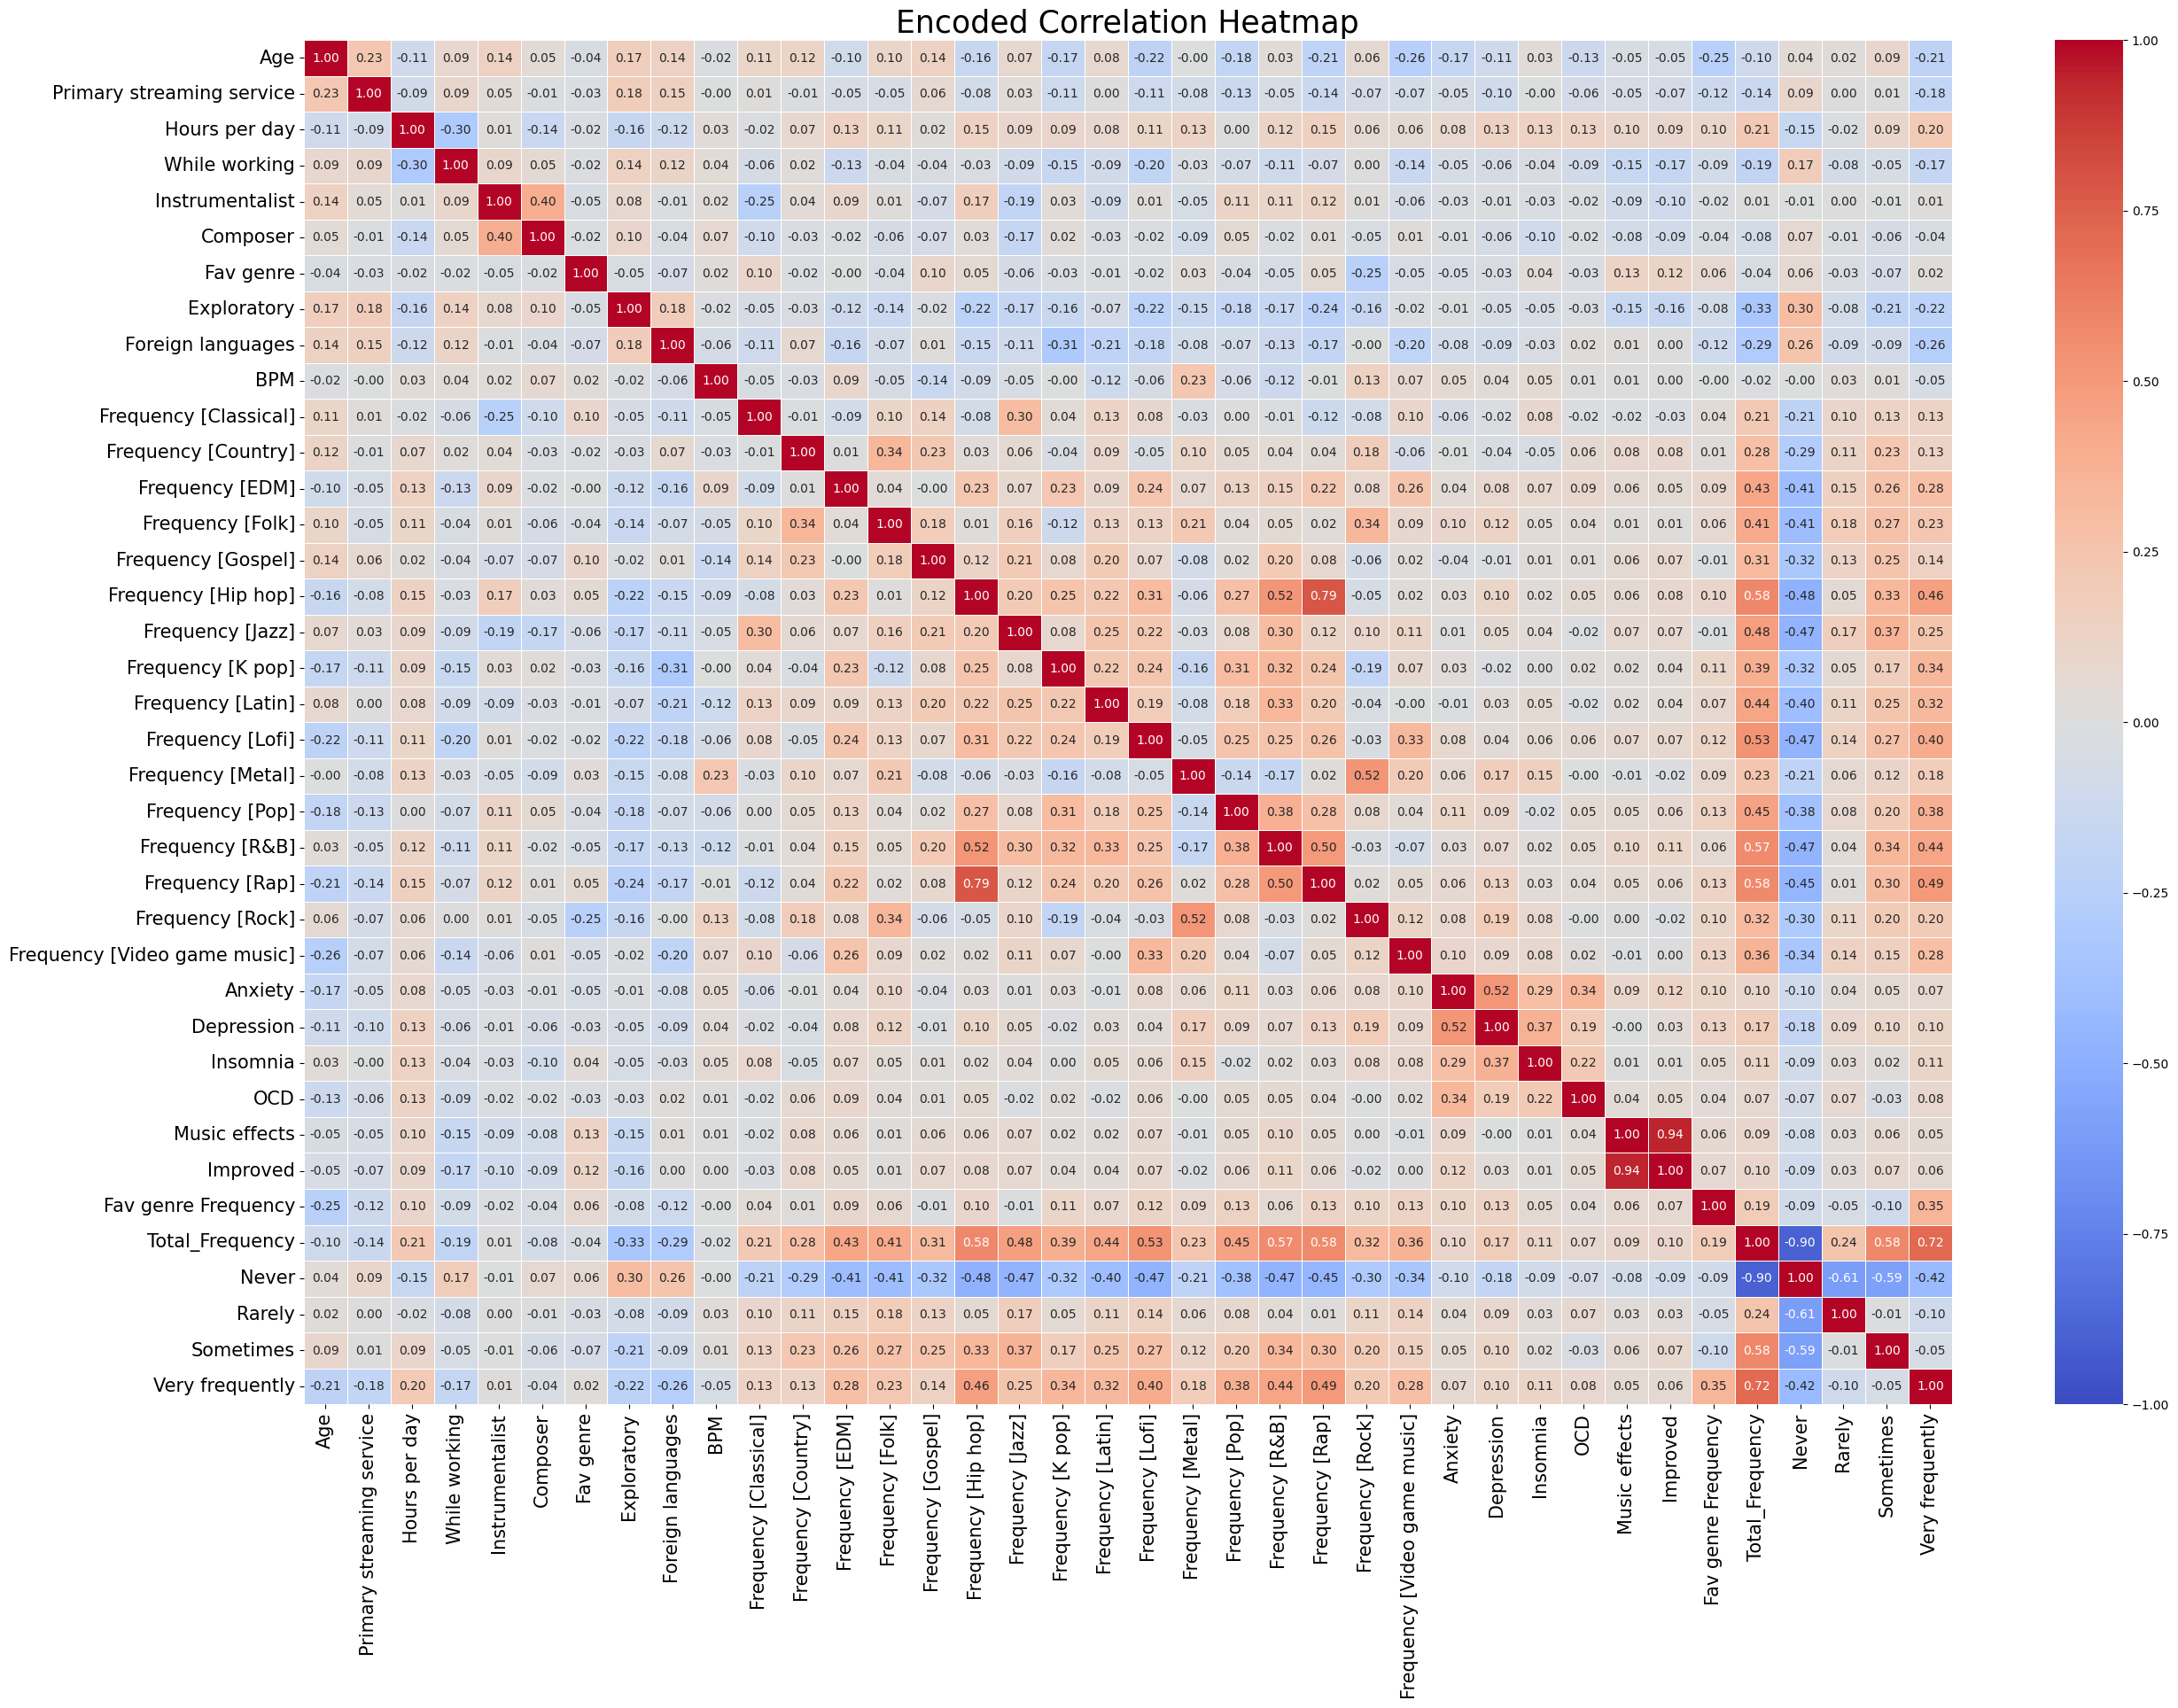

In [ ]:
# Correlation matrix on df_encoded
full_corr = df_encoded.corr()

plt.figure(figsize=(30,20))
sns.heatmap(full_corr, annot=True, cmap='coolwarm', linewidths=0.5,vmin=-1,fmt=".2f")
plt.title('Encoded Correlation Heatmap',fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

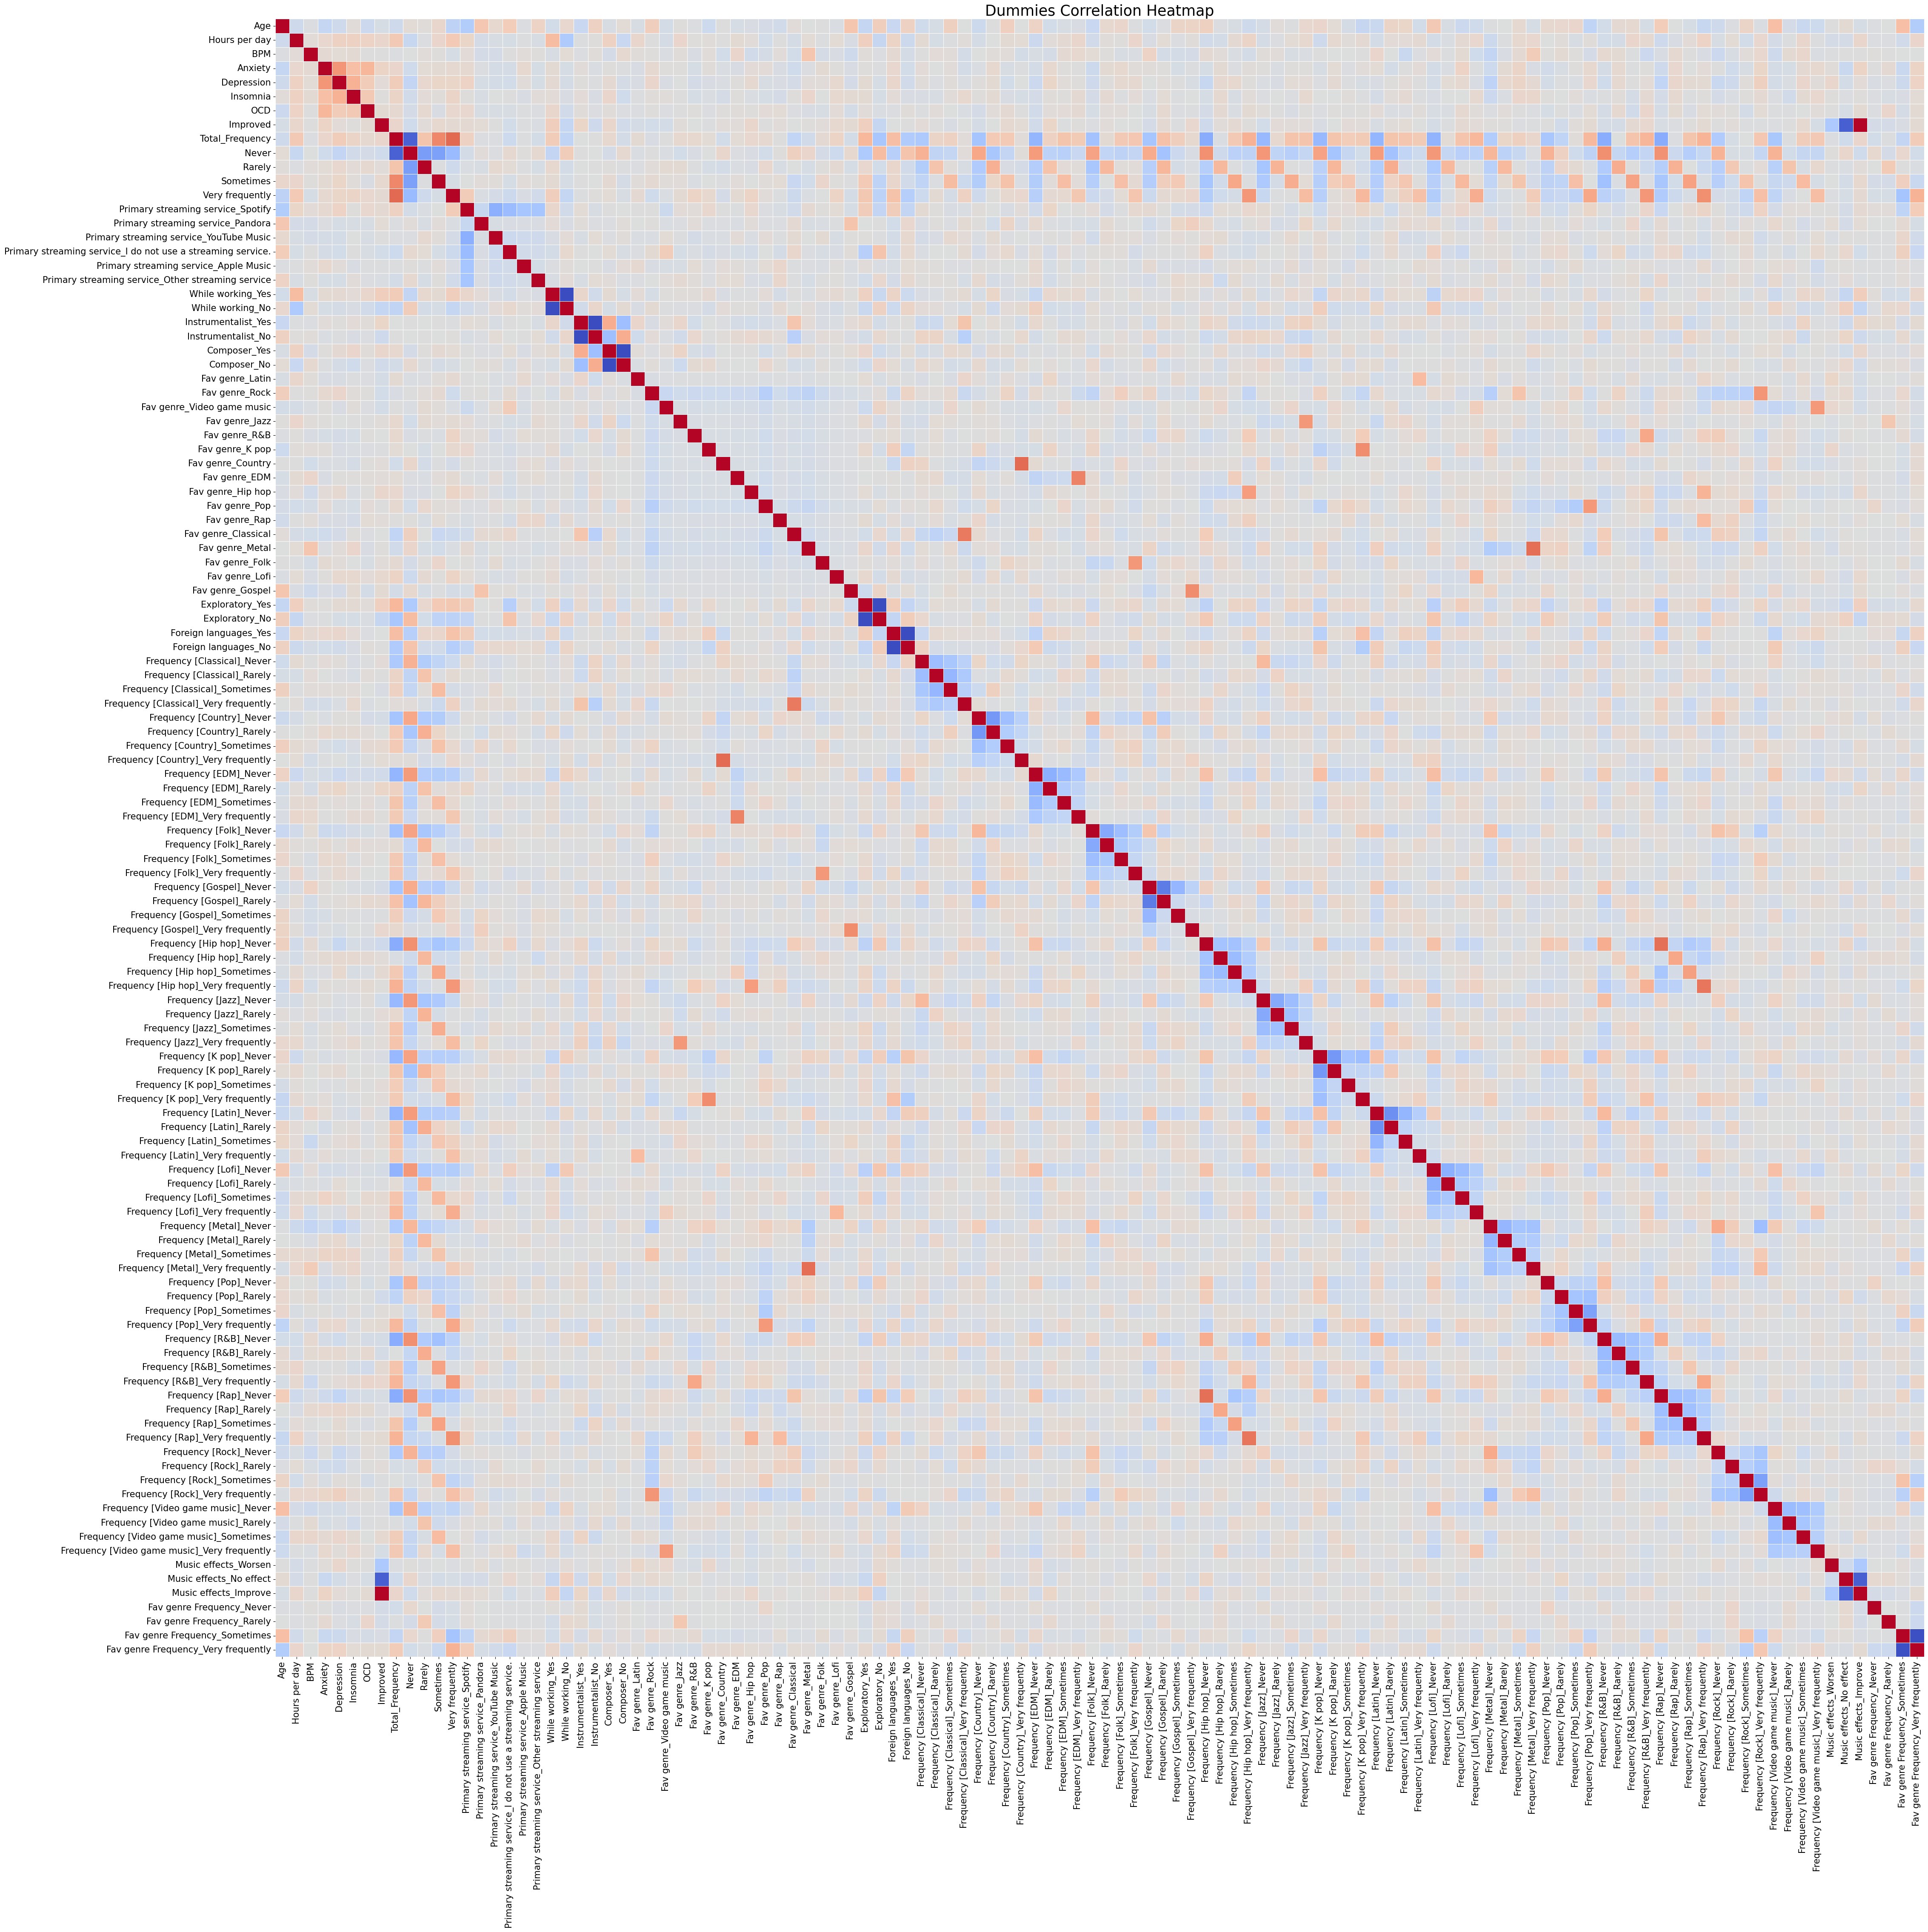

In [ ]:
# Correlation matrix with dummies, df_clean
df_dummies = pd.get_dummies(df_clean.copy())

plt.figure(figsize=(50,50))
sns.heatmap(df_dummies.corr(), cmap='coolwarm', linewidths=0.5,vmin=-1,cbar=False)
plt.title('Dummies Correlation Heatmap',fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
# # Scaled dataset
# df = df_clean.copy()
# df = df.select_dtypes('number')

# df_scaled = (df-df.min())/(df.max()-df.min())
# df_scaled_corr = df_scaled.corr()

# df_merged = pd.concat([df_scaled,freq.drop(columns=df_scaled.columns)],axis=1)
# df_merged_corr = df_merged.corr()

# plt.figure(figsize=(20, 10))
# # sns.heatmap(df_scaled_corr, annot=True, cmap='coolwarm', linewidths=0.5)
# sns.heatmap(df_merged_corr, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Heatmap')
# plt.show()

In [ ]:
# df_scaled

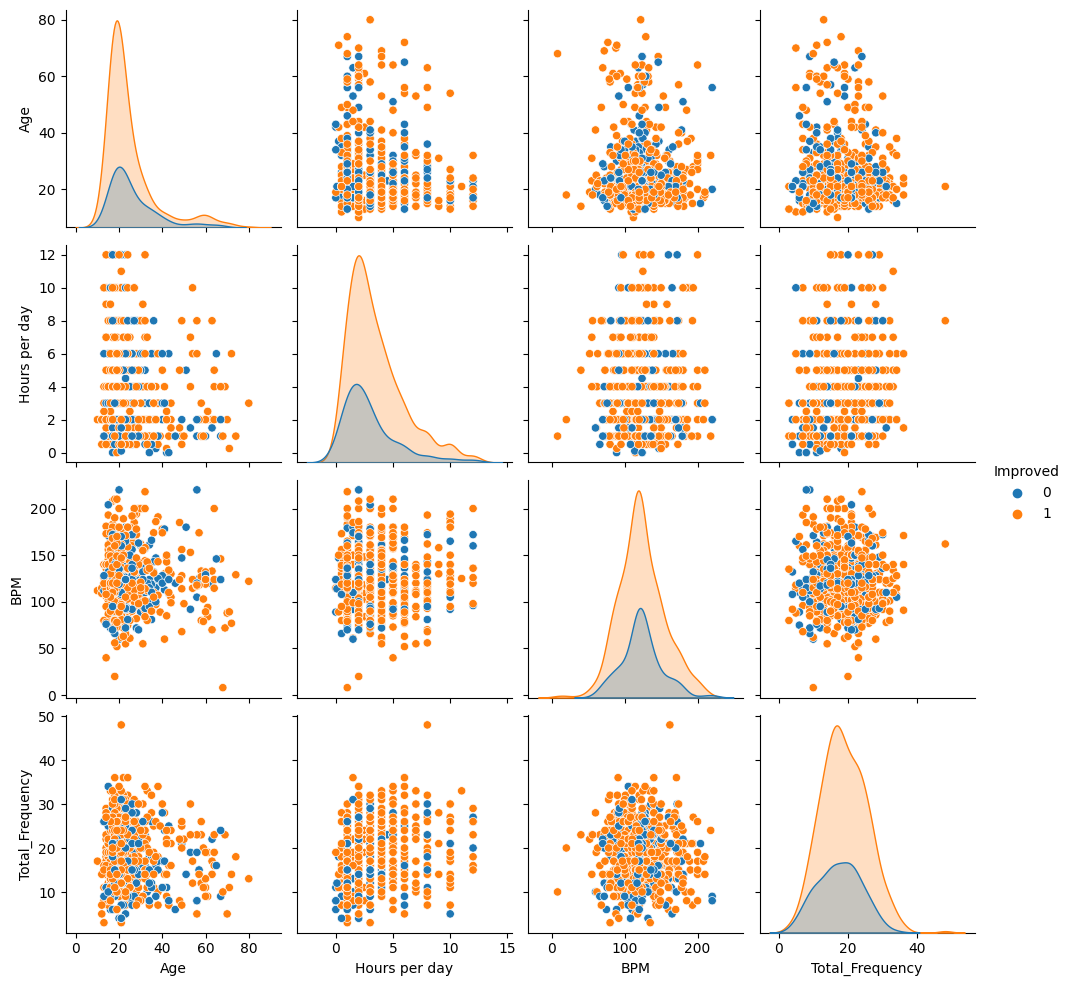

In [ ]:
# plt.figure(figsize=(10, 5))
sns.pairplot(df_clean[['Age', 'Hours per day', 'BPM', 'Total_Frequency','Improved']], hue='Improved')
plt.show()

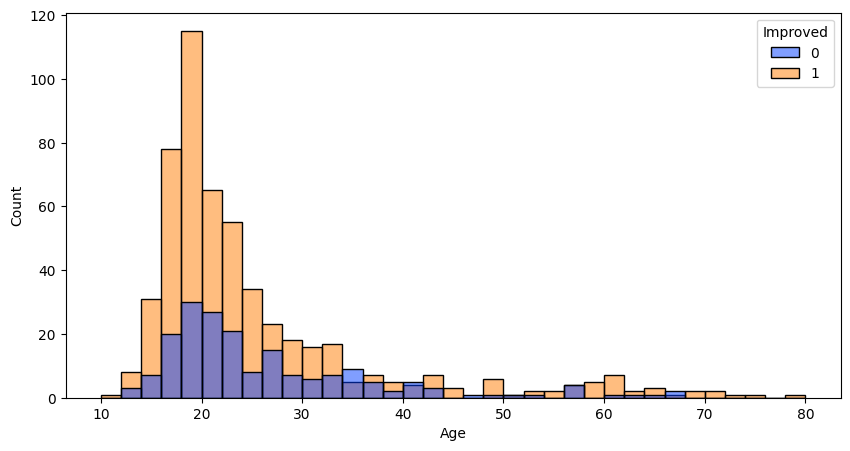

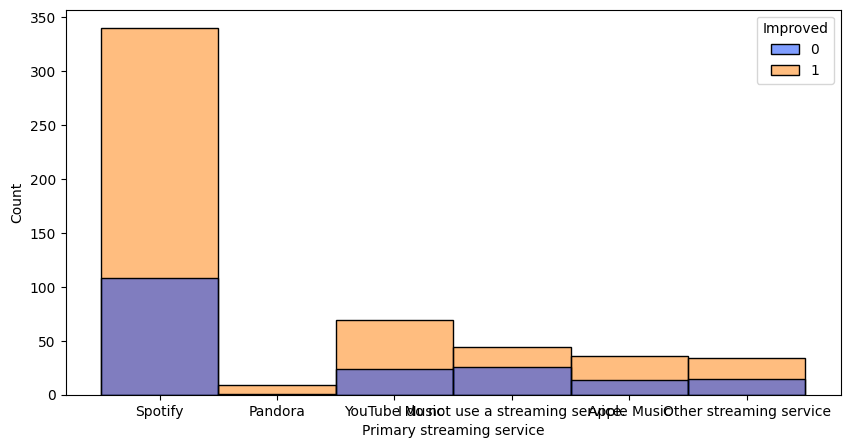

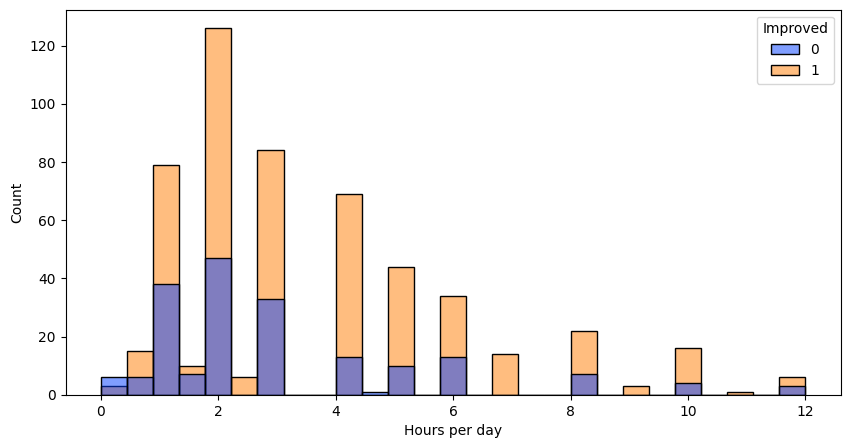

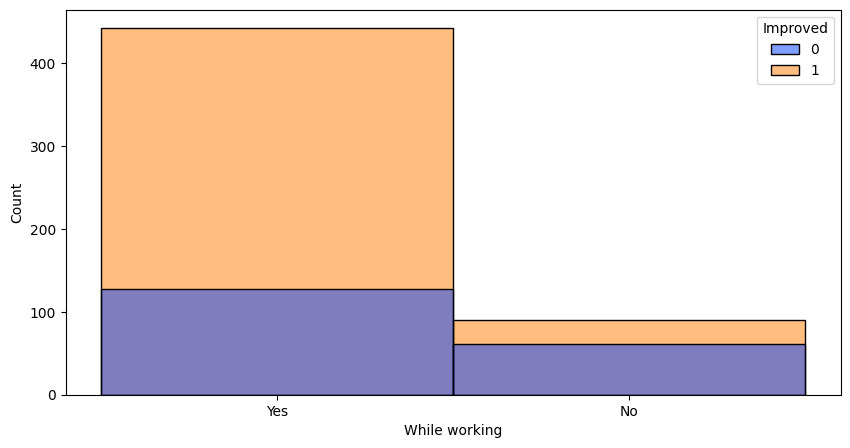

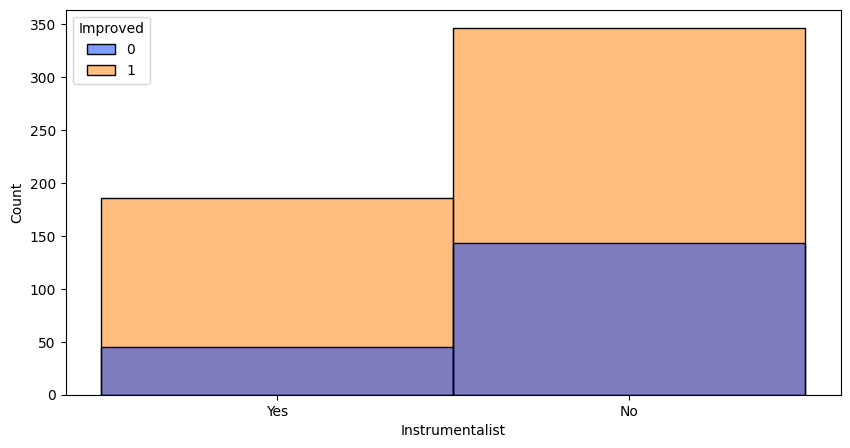

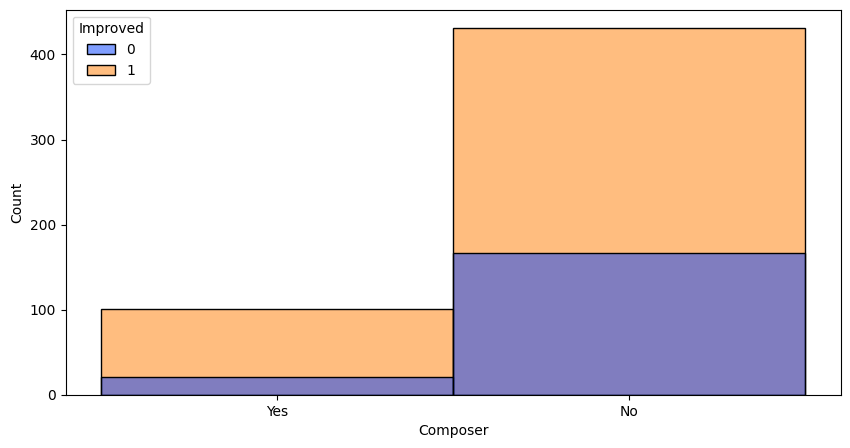

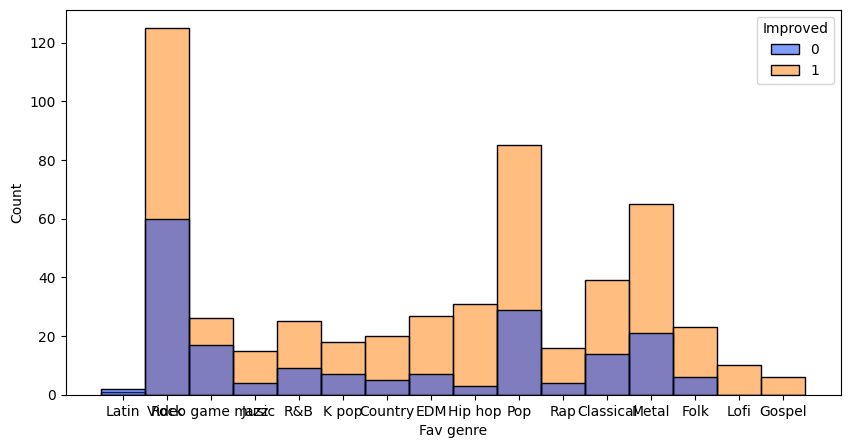

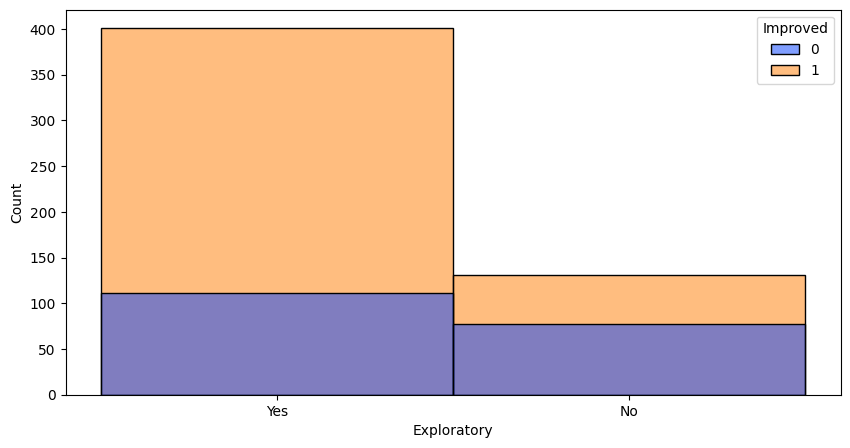

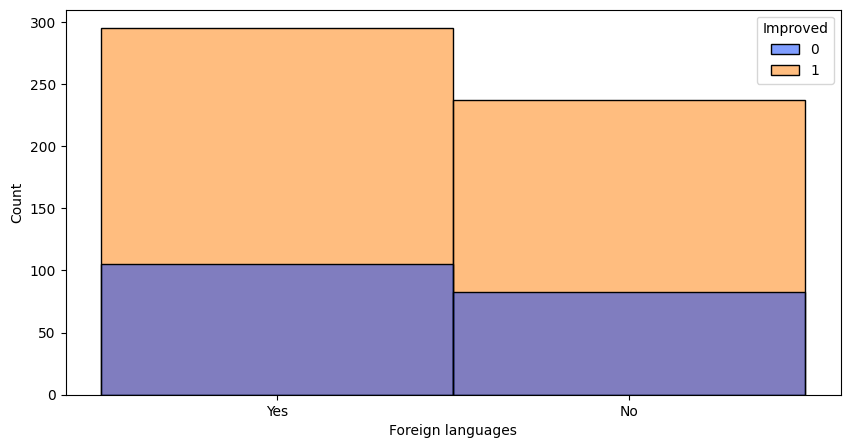

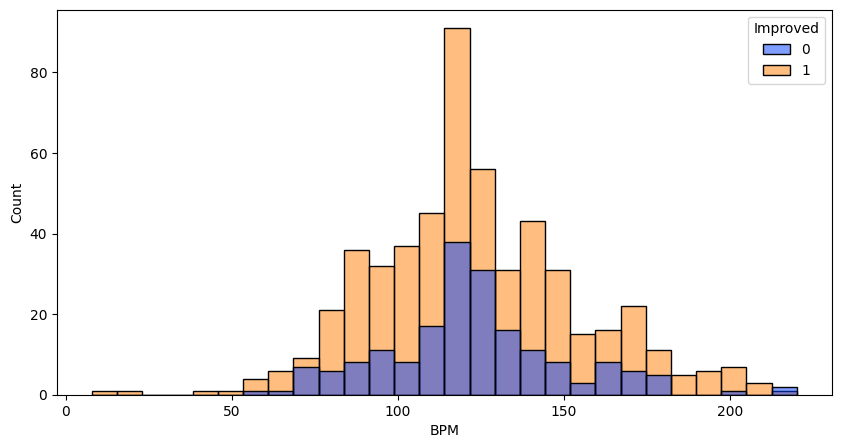

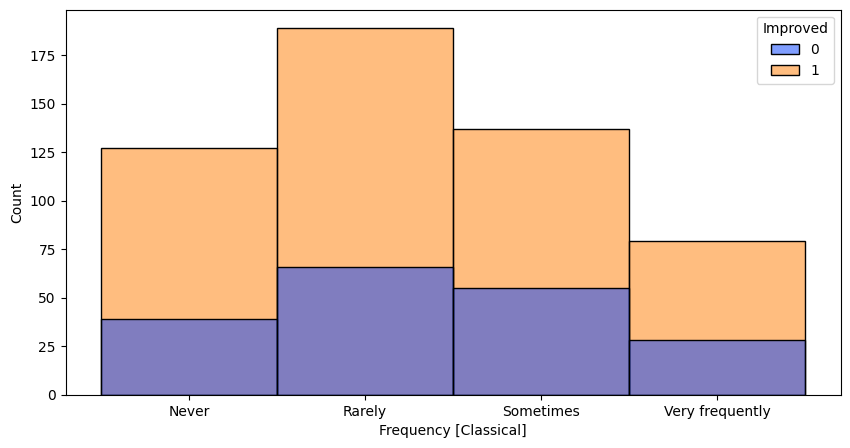

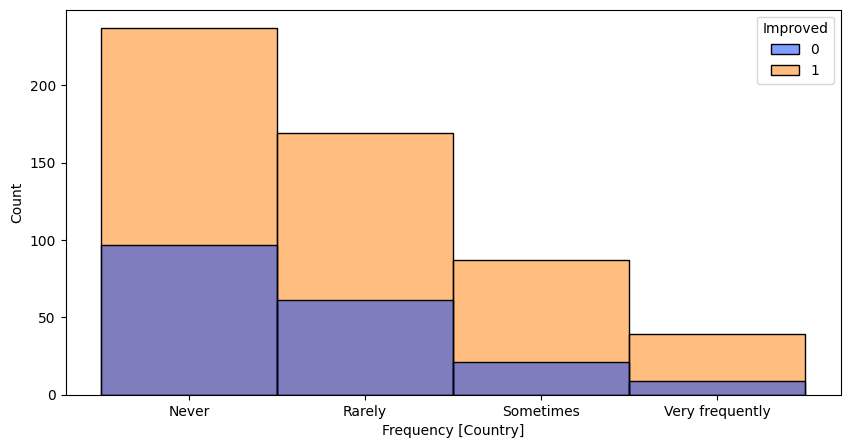

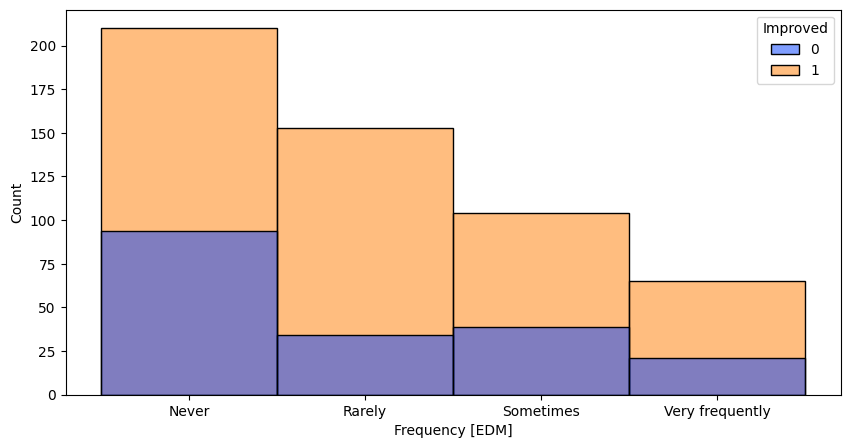

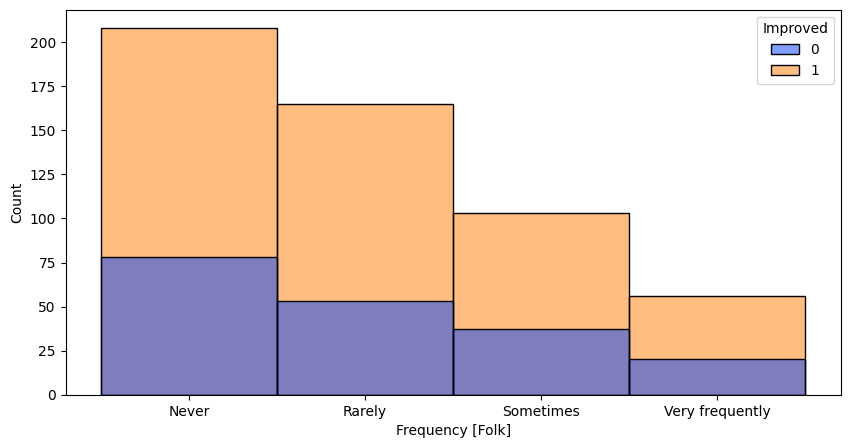

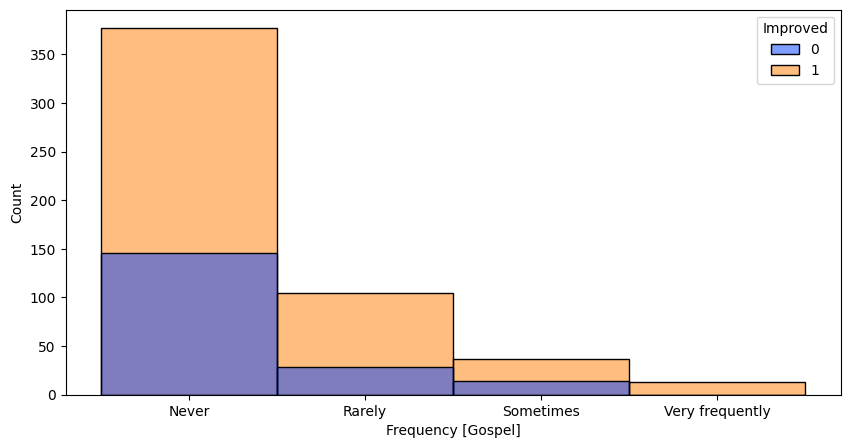

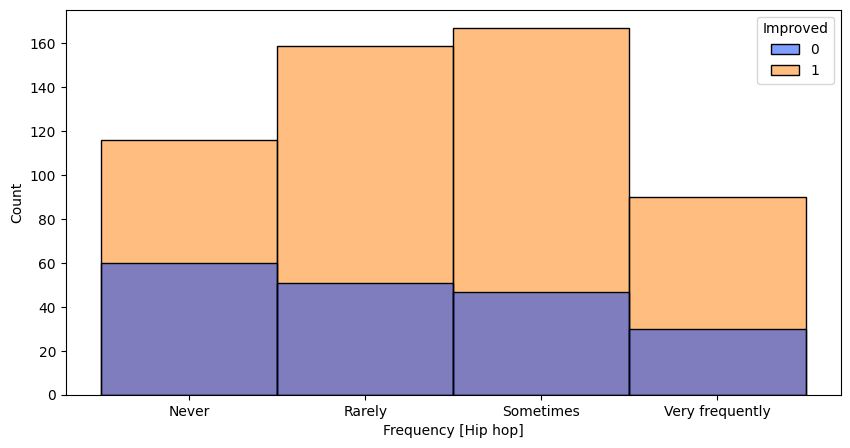

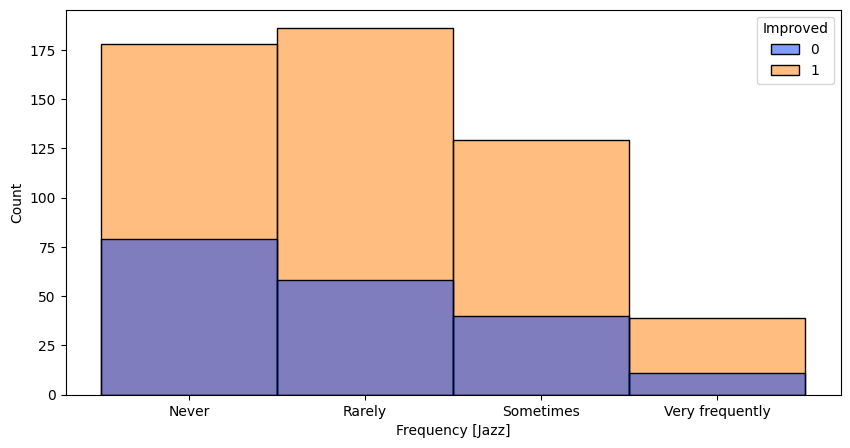

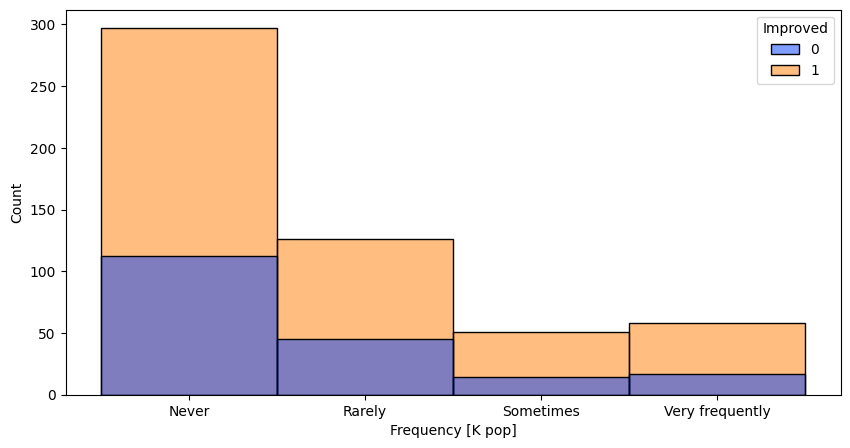

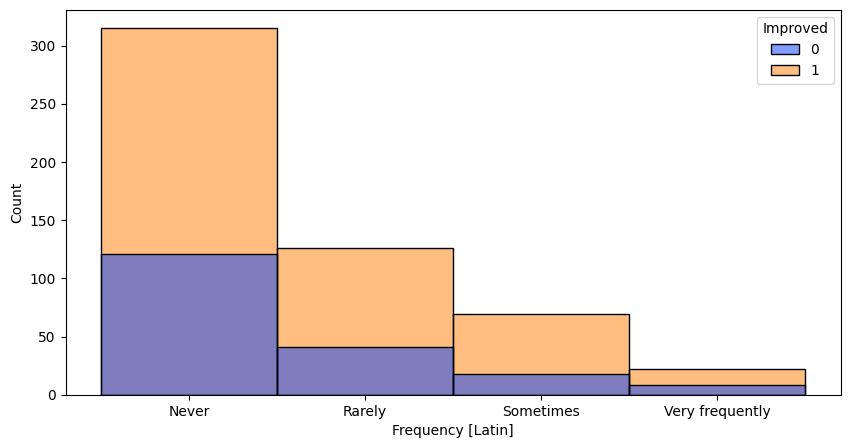

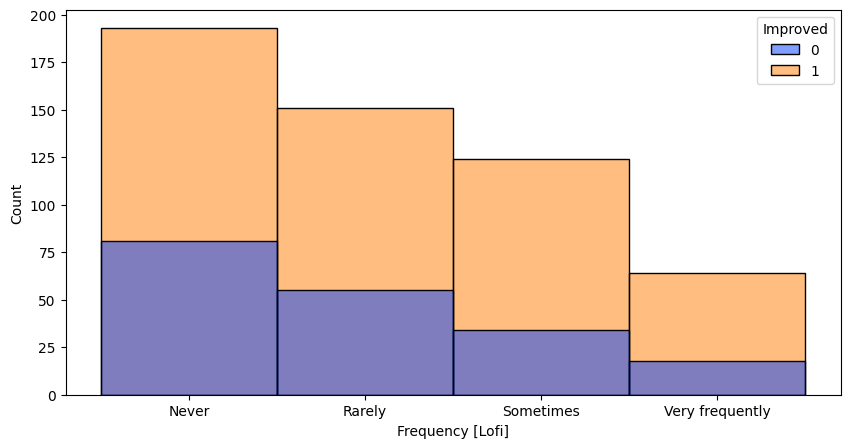

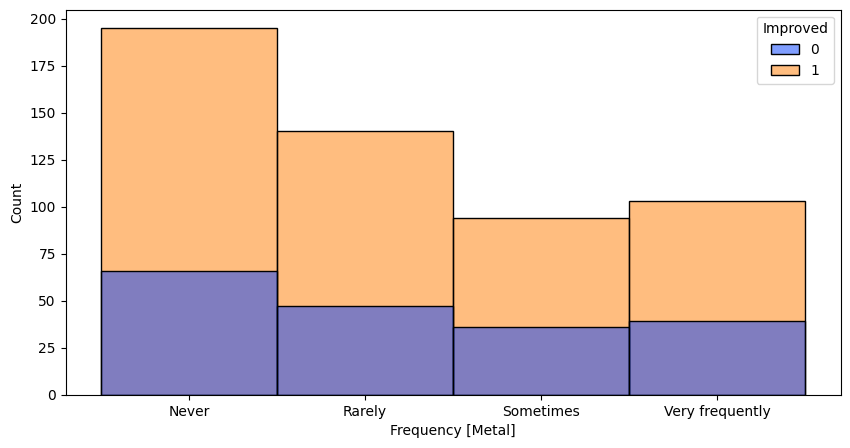

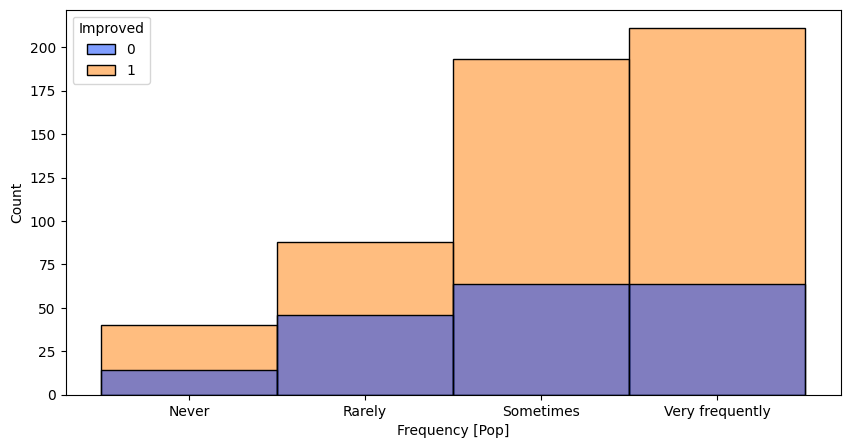

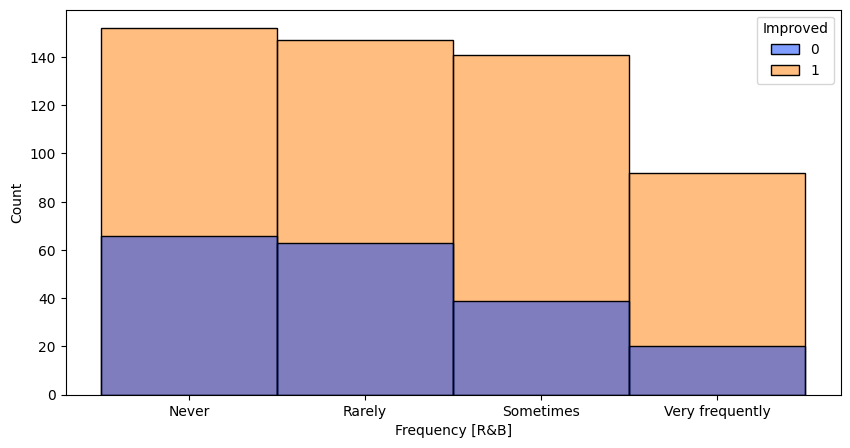

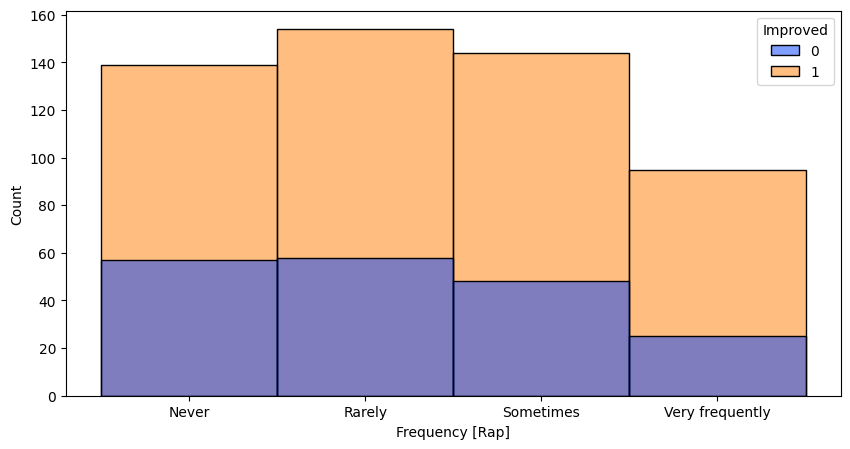

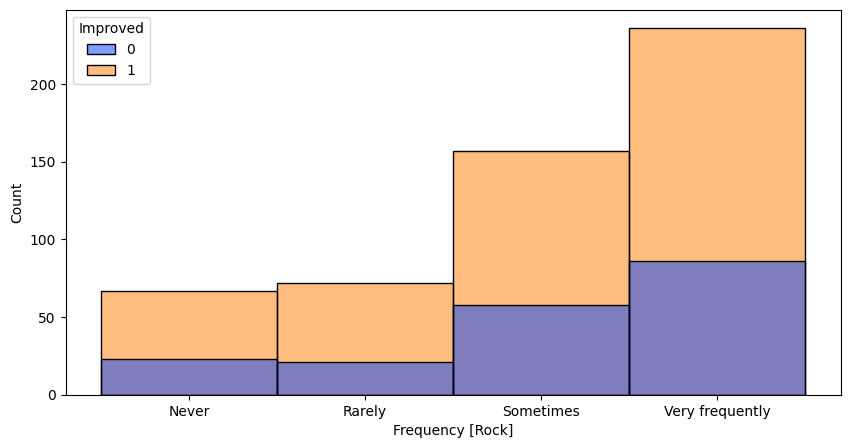

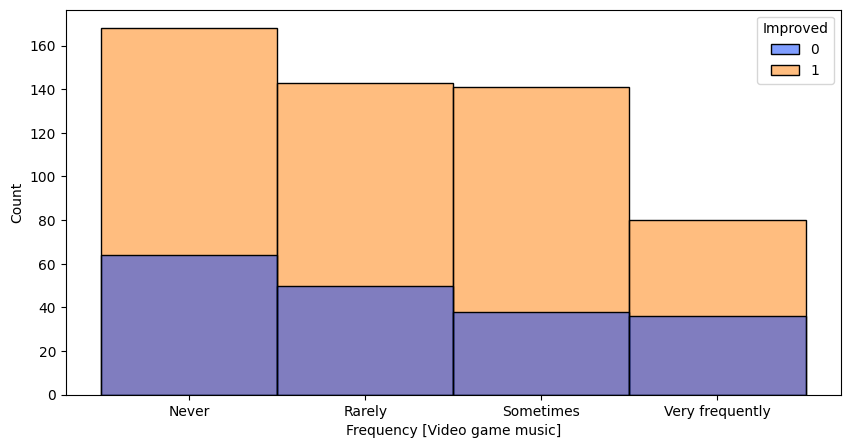

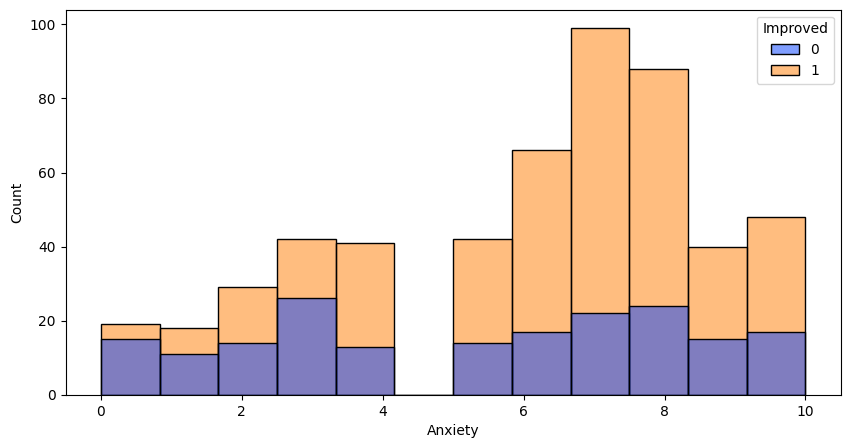

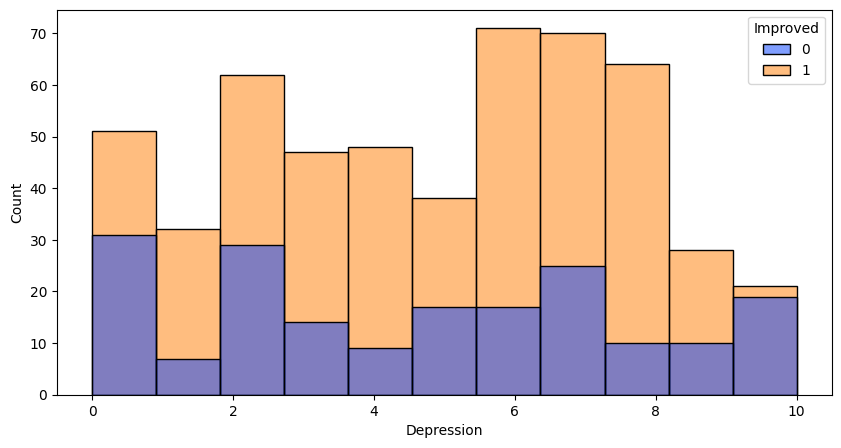

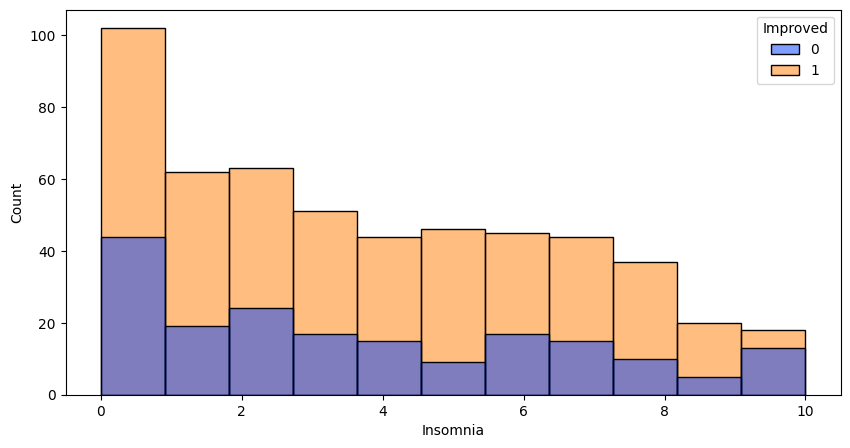

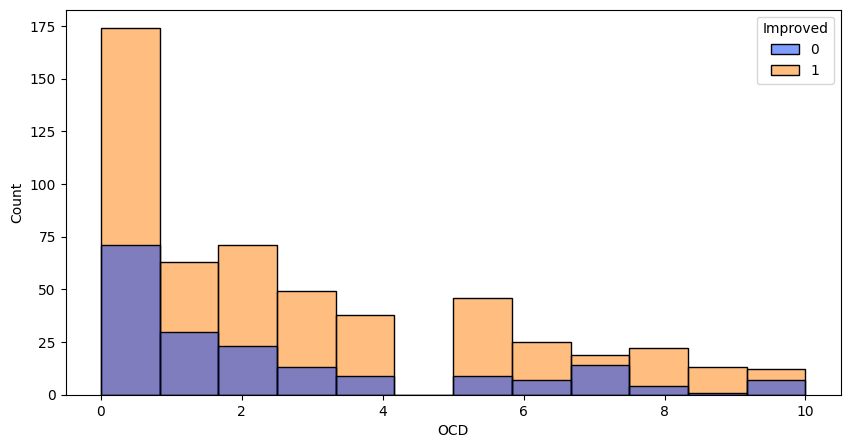

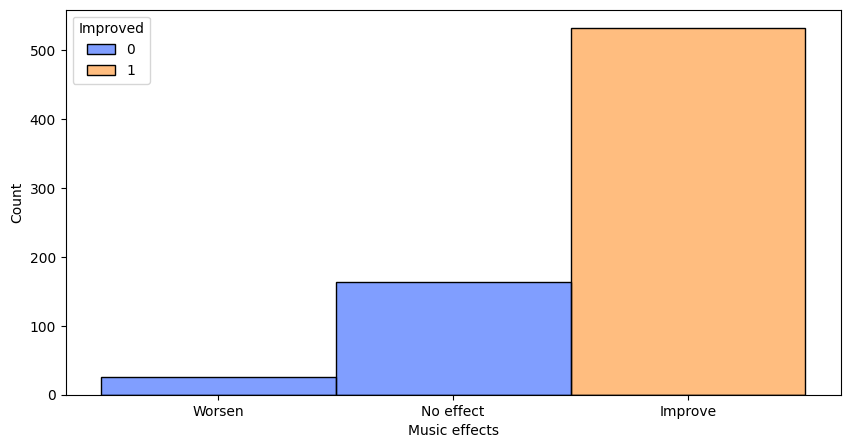

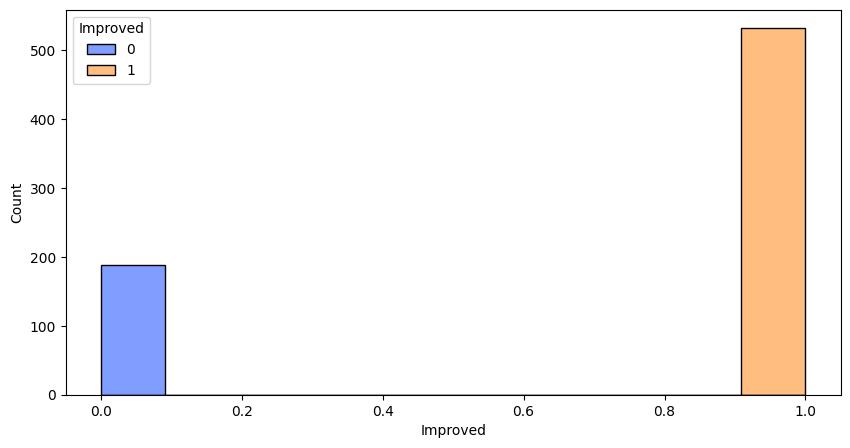

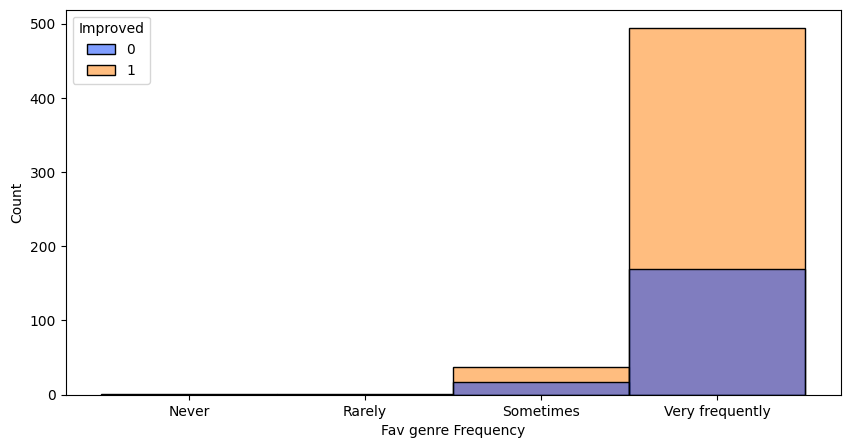

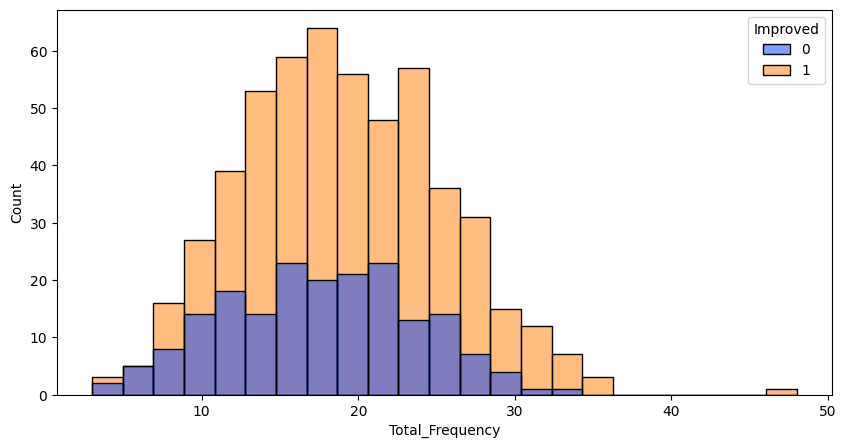

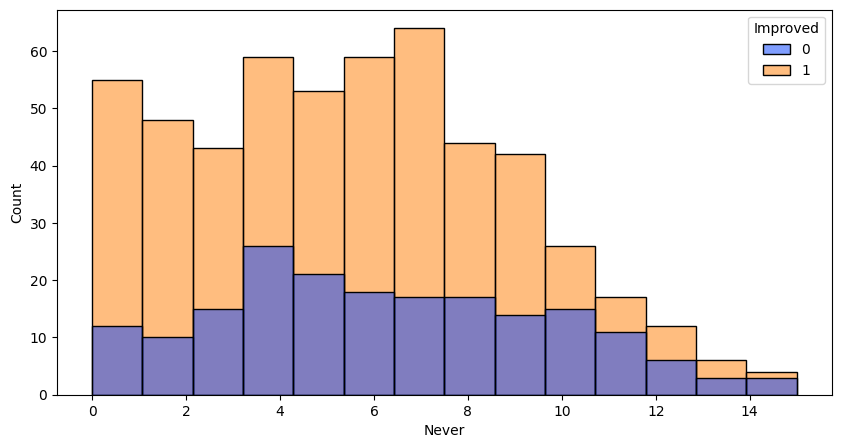

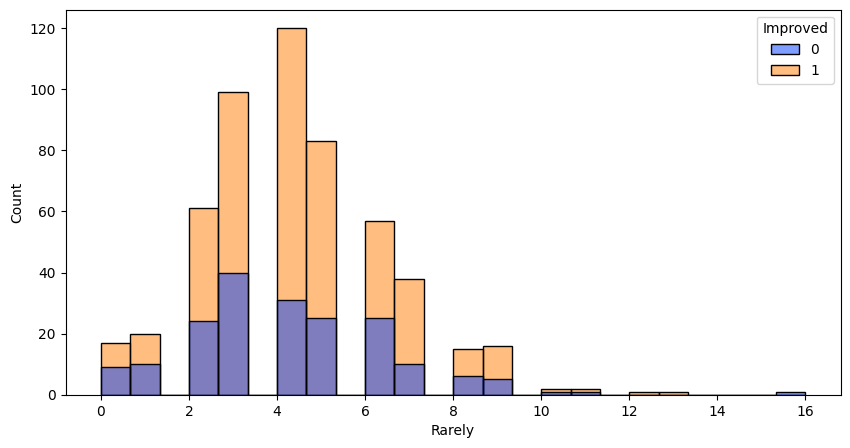

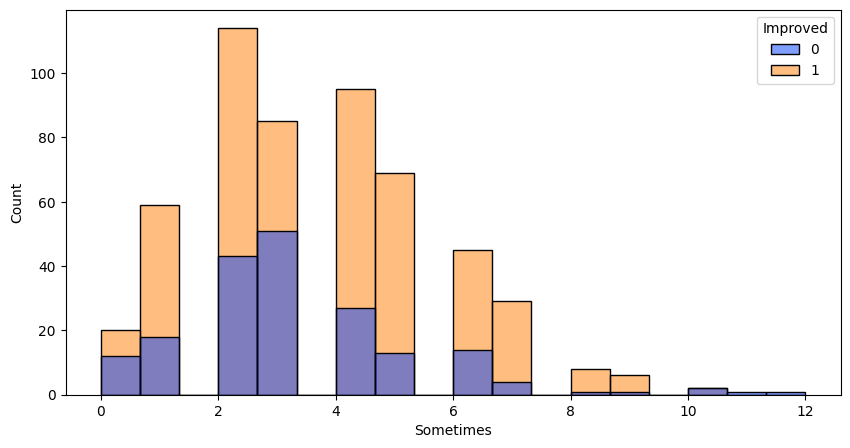

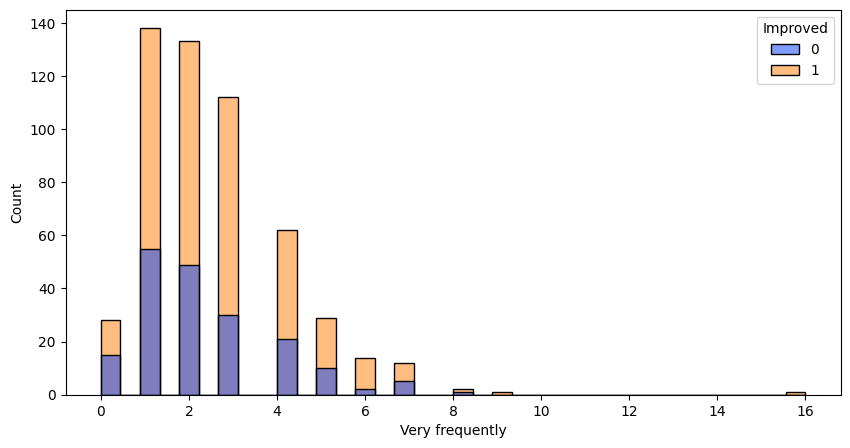

In [ ]:
for col in df_clean.columns:
  plt.figure(figsize=(10, 5))
  sns.histplot(data=df_clean, x=col, hue='Improved', palette='bright')
  plt.show()

In [ ]:
len(frequencyCols)

16

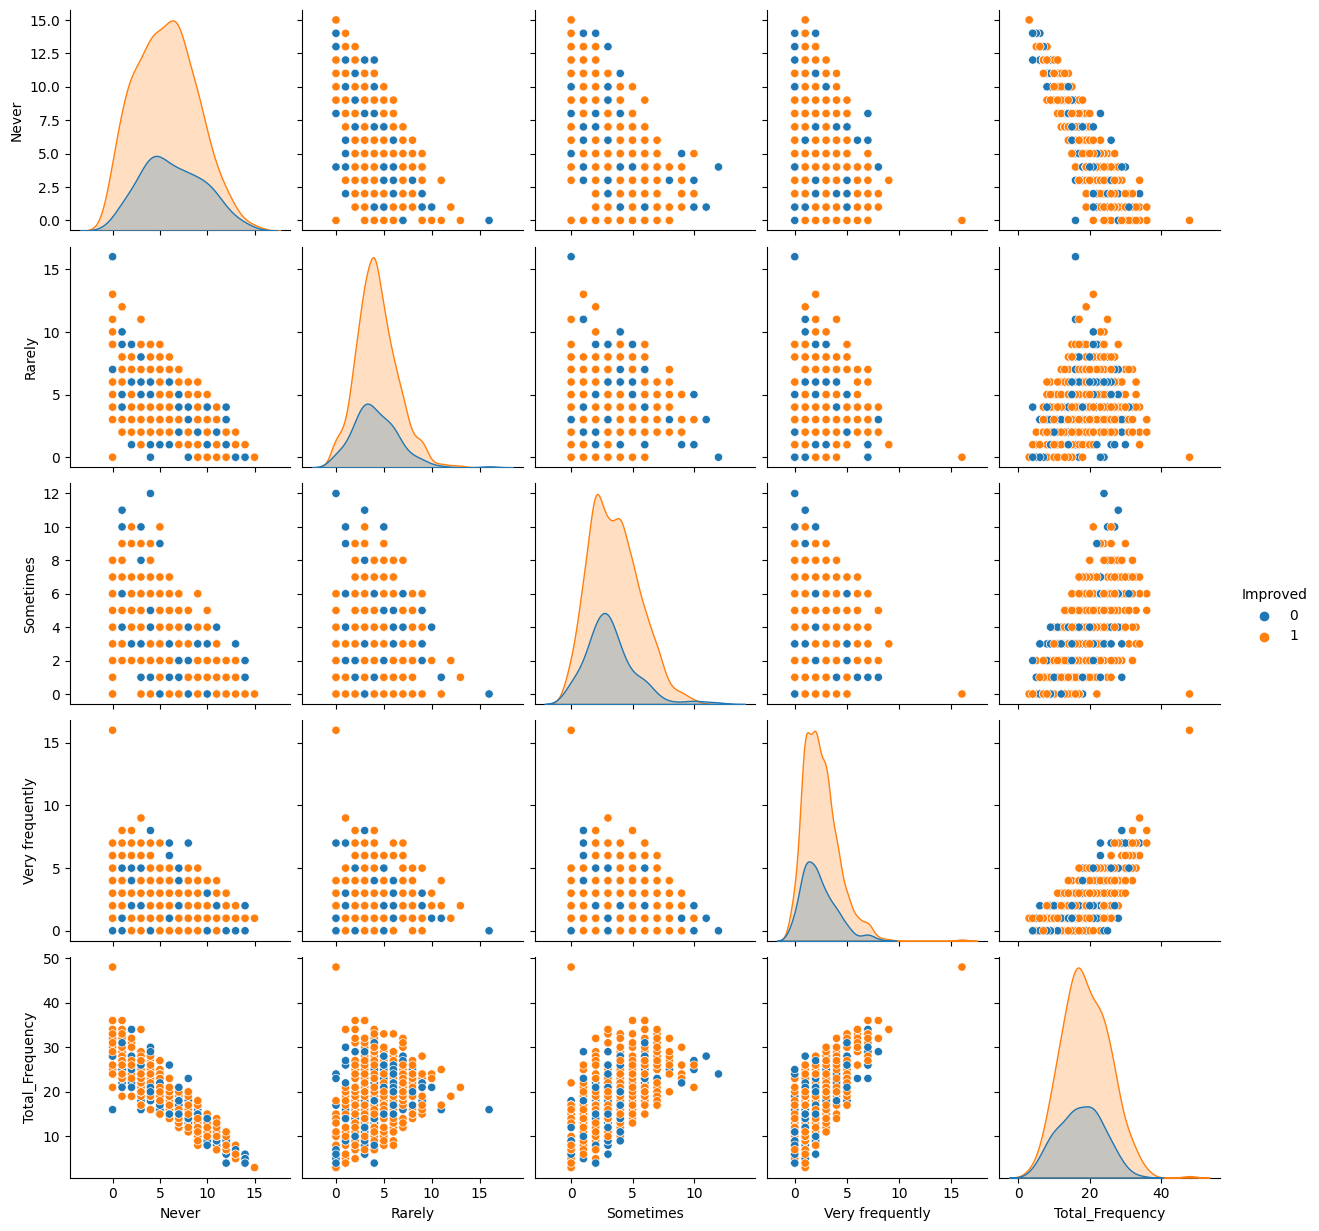

In [ ]:
sns.pairplot(df_clean[['Never','Rarely','Sometimes','Very frequently','Total_Frequency','Improved']], hue='Improved')
plt.show()

In [ ]:
# for col in df_clean.columns:
#   print(check_col_values(df_clean[col]),'\n','='*20)

In [ ]:
# sns.scatterplot(data=df_scaled,x='BPM',y='Age',hue='Improved')
# plt.show()

In [ ]:
# sns.relplot(data=df_clean,x='BPM',y='Age',hue='Improved',col='Fav genre Frequency',kind='scatter')
# plt.show()

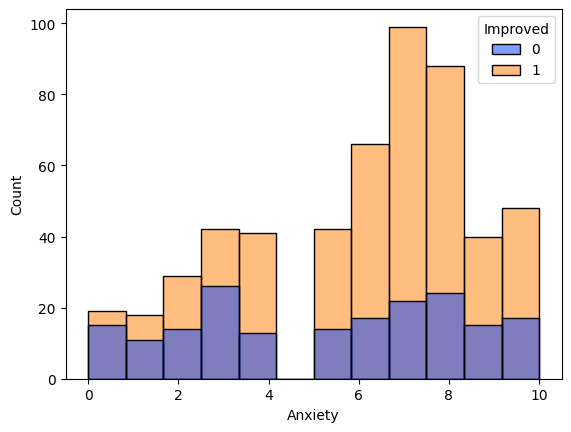

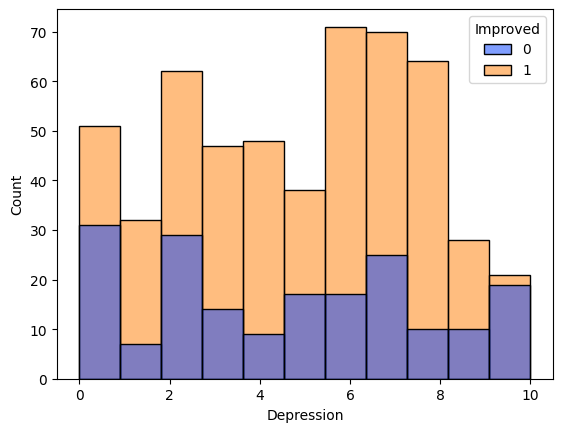

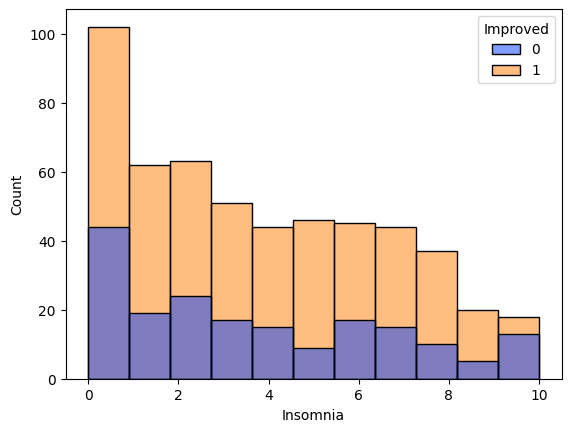

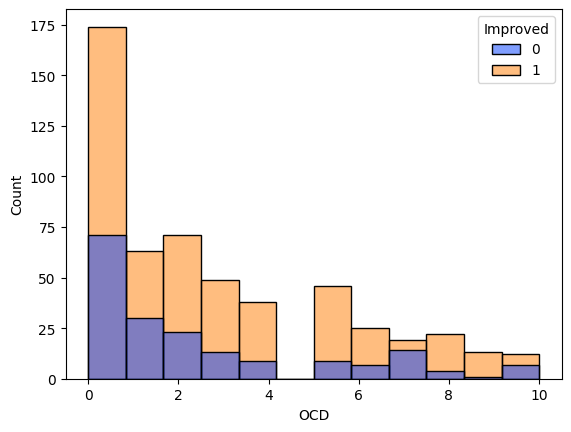

In [ ]:
for col in ['Anxiety','Depression','Insomnia','OCD']:
  # plt.figure(figsize=(10, 5))
  sns.histplot(data=df_clean, x=col, hue='Improved', palette='bright')
  plt.show()

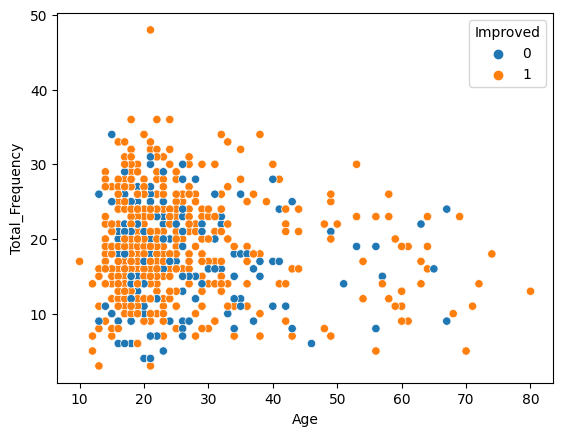

In [ ]:
# Check Age compared to Frequency
sns.scatterplot(data=df_clean, x='Age',y='Total_Frequency',hue='Improved')
plt.show()

In [ ]:
df_clean.head(5)

Age Primary streaming service  Hours per day While working  \
0  18.0                   Spotify            3.0           Yes   
1  63.0                   Pandora            1.5           Yes   
2  18.0                   Spotify            4.0            No   
3  61.0             YouTube Music            2.5           Yes   
4  18.0                   Spotify            4.0           Yes   

  Instrumentalist Composer         Fav genre Exploratory Foreign languages  \
0             Yes      Yes             Latin         Yes               Yes   
1              No       No              Rock         Yes                No   
2              No       No  Video game music          No               Yes   
3              No      Yes              Jazz         Yes               Yes   
4              No       No               R&B         Yes                No   

     BPM Frequency [Classical] Frequency [Country]  Frequency [EDM]  \
0  156.0                Rarely               Never           Rarely   
1  119.0             Sometimes               Never            Never   
2  132.0                 Never               Never  Very frequently   
3   84.0             Sometimes               Never            Never   
4  107.0                 Never               Never           Rarely   

  Frequency [Folk] Frequency [Gospel] Frequency [Hip hop] Frequency [Jazz]  \
0            Never              Never           Sometimes            Never   
1           Rarely          Sometimes              Rarely  Very frequently   
2            Never              Never              Rarely           Rarely   
3           Rarely          Sometimes               Never  Very frequently   
4            Never             Rarely     Very frequently            Never   

  Frequency [K pop] Frequency [Latin] Frequency [Lofi] Frequency [Metal]  \
0   Very frequently   Very frequently           Rarely             Never   
1            Rarely         Sometimes           Rarely             Never   
2   Very frequently             Never        Sometimes         Sometimes   
3         Sometimes   Very frequently        Sometimes             Never   
4   Very frequently         Sometimes        Sometimes             Never   

   Frequency [Pop]  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0  Very frequently        Sometimes  Very frequently            Never   
1        Sometimes        Sometimes           Rarely  Very frequently   
2           Rarely            Never           Rarely           Rarely   
3        Sometimes        Sometimes            Never            Never   
4        Sometimes  Very frequently  Very frequently            Never   

  Frequency [Video game music]  Anxiety  Depression  Insomnia  OCD  \
0                    Sometimes      3.0         0.0       1.0  0.0   
1                       Rarely      7.0         2.0       2.0  1.0   
2              Very frequently      7.0         7.0      10.0  2.0   
3                        Never      9.0         7.0       3.0  3.0   
4                       Rarely      7.0         2.0       5.0  9.0   

  Music effects  Improved Fav genre Frequency  Total_Frequency  Never  Rarely  \
0        Worsen         0     Very frequently               21      6       3   
1        Worsen         0     Very frequently               22      3       6   
2     No effect         0     Very frequently               18      6       5   
3       Improve         1     Very frequently               19      7       1   
4       Improve         1     Very frequently               21      6       3   

   Sometimes  Very frequently  
0          3                4  
1          5                2  
2          2                3  
3          6                2  
4          3                4

### BPM

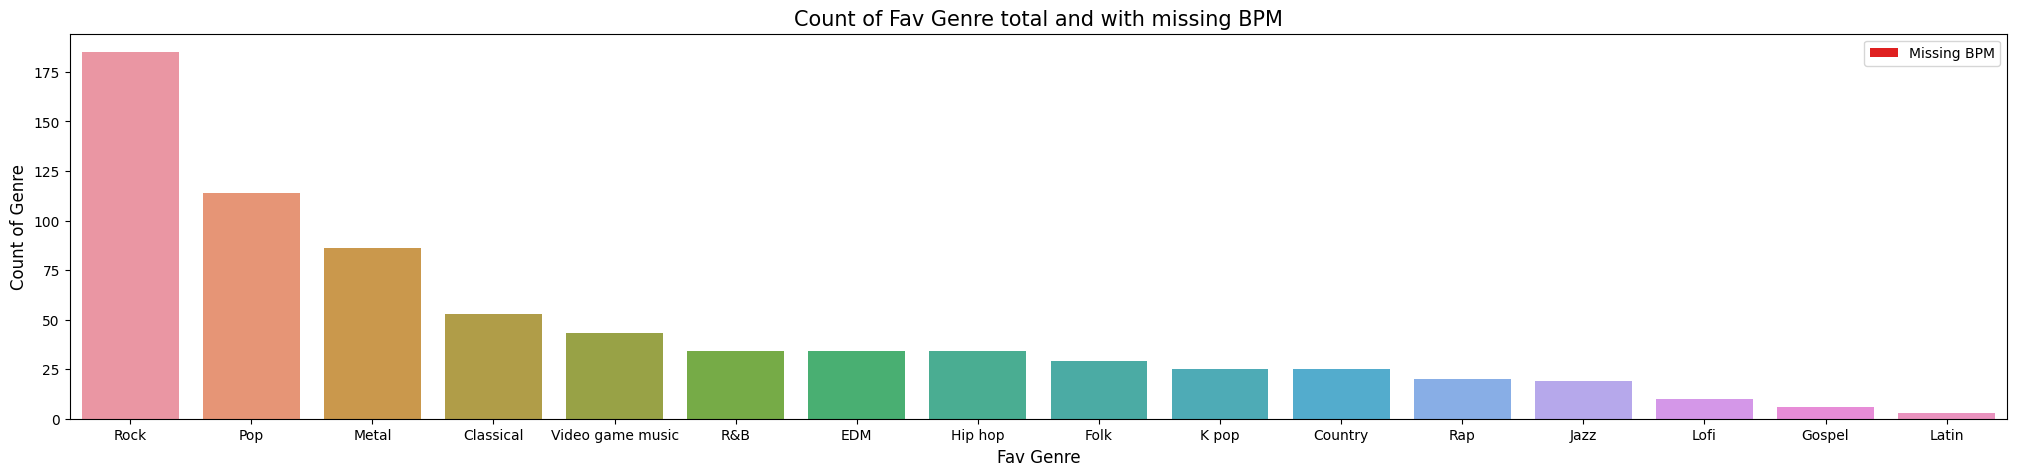

In [ ]:
# Order columns from highest count, to ensure columns are in the proper order
genres = df_clean.groupby(by='Fav genre')['BPM'].count().sort_values(ascending=False).index
# print(genres)

# Count entries per Fav Genre in entire dataset and with Missing BPMs
plt.figure(figsize=(25,5))
sns.countplot(data=df_clean,x='Fav genre',order=genres)
sns.countplot(data=df_clean[df_clean['BPM'].isna()],x='Fav genre',color='red',label='Missing BPM',order=genres)
plt.xlabel('Fav Genre',fontsize=12)
plt.ylabel('Count of Genre',fontsize=12)
plt.title('Count of Fav Genre total and with missing BPM',fontsize=15)
plt.legend()
plt.show()

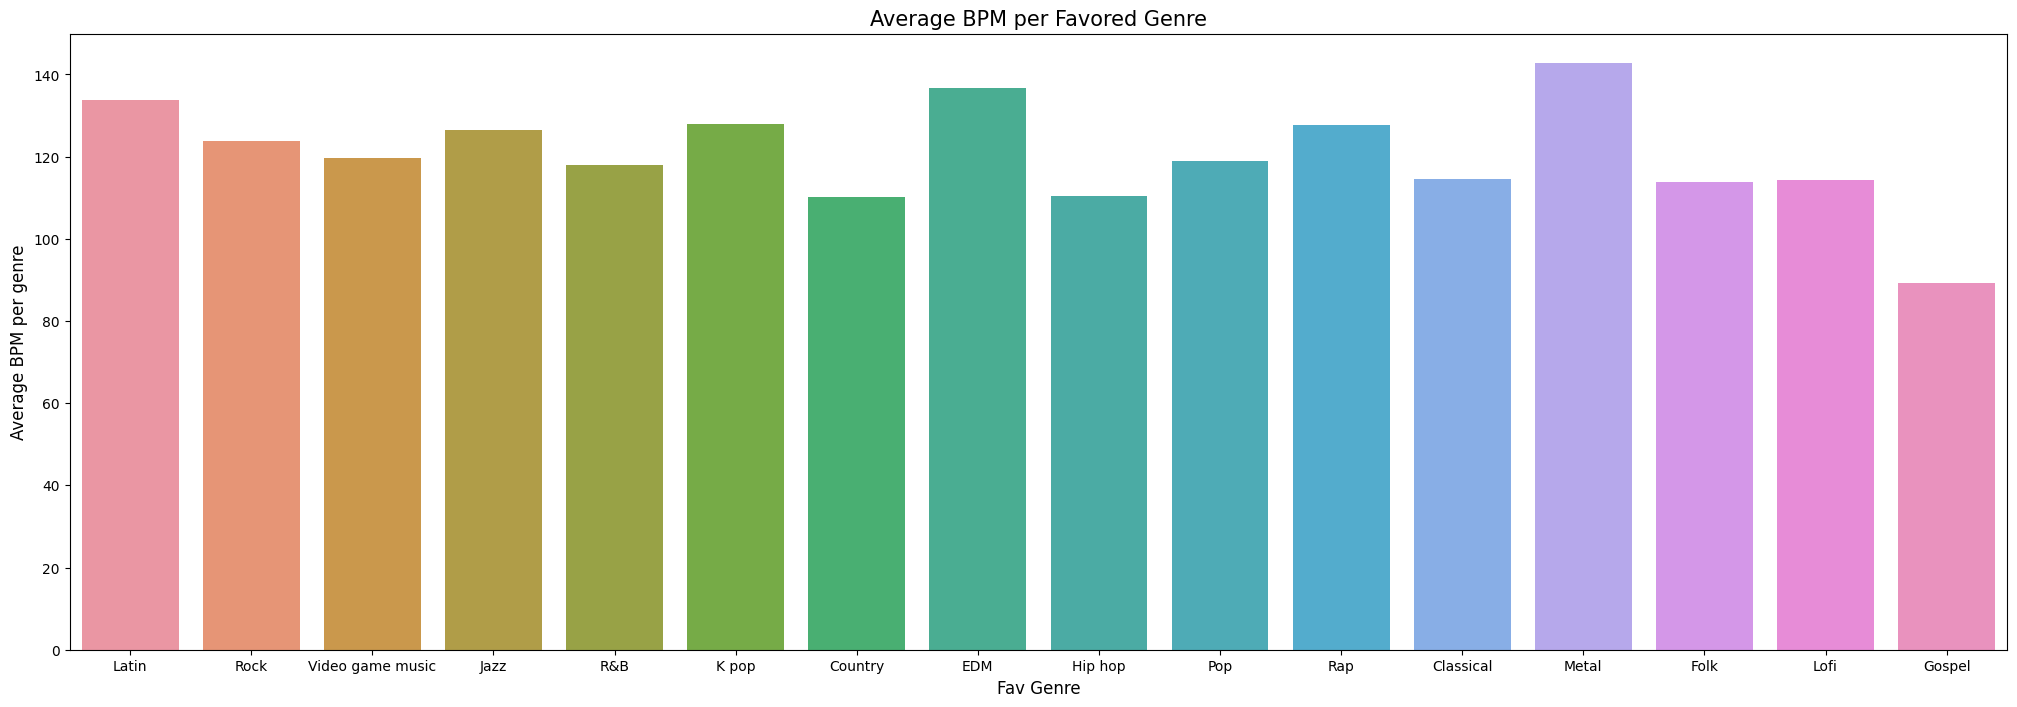

In [ ]:
# Check average BPM per favourite genre
plt.figure(figsize=(25,8))
sns.barplot(data=df_clean.sort_values(by='Fav genre'),x='Fav genre',y='BPM',errorbar=None,estimator='mean')
# plt.plot(df_clean.sort_values(by='Fav genre')['Fav genre'].unique(),df_clean.groupby(by='Fav genre')['BPM'].mean())
plt.xlabel('Fav Genre',fontsize=12)
plt.ylabel('Average BPM per genre',fontsize=12)
plt.title('Average BPM per Favored Genre',fontsize=15)
plt.show()

# Machine Learning Algorithms

In [ ]:
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from mlxtend.plotting import plot_decision_regions

In [ ]:
df_clean.describe()

Age  Hours per day         BPM     Anxiety  Depression  \
count  720.000000     720.000000  720.000000  720.000000  720.000000   
mean    25.048611       3.370208  123.159015    5.834028    4.770833   
std     11.722053       2.457344   30.346134    2.791657    3.005486   
min     10.000000       0.000000    8.000000    0.000000    0.000000   
25%     18.000000       2.000000  105.000000    4.000000    2.000000   
50%     21.000000       3.000000  120.000000    6.000000    5.000000   
75%     27.000000       4.000000  140.000000    8.000000    7.000000   
max     80.000000      12.000000  220.000000   10.000000   10.000000   

         Insomnia         OCD    Improved  Total_Frequency       Never  \
count  720.000000  720.000000  720.000000       720.000000  720.000000   
mean     3.703472    2.606944    0.738889        18.516667    5.855556   
std      3.062615    2.821600    0.439546         6.517314    3.236823   
min      0.000000    0.000000    0.000000         3.000000    0.000000   
25%      1.000000    0.000000    0.000000        14.000000    3.000000   
50%      3.000000    2.000000    1.000000        18.000000    6.000000   
75%      6.000000    4.000000    1.000000        23.000000    8.000000   
max     10.000000   10.000000    1.000000        48.000000   15.000000   

           Rarely   Sometimes  Very frequently  
count  720.000000  720.000000       720.000000  
mean     4.236111    3.444444         2.463889  
std      2.173894    2.021366         1.696376  
min      0.000000    0.000000         0.000000  
25%      3.000000    2.000000         1.000000  
50%      4.000000    3.000000         2.000000  
75%      6.000000    5.000000         3.000000  
max     16.000000   12.000000        16.000000

In [ ]:
df_clean.dtypes

Age                              float64
Primary streaming service       category
Hours per day                    float64
While working                   category
Instrumentalist                 category
Composer                        category
Fav genre                       category
Exploratory                     category
Foreign languages               category
BPM                              float64
Frequency [Classical]           category
Frequency [Country]             category
Frequency [EDM]                 category
Frequency [Folk]                category
Frequency [Gospel]              category
Frequency [Hip hop]             category
Frequency [Jazz]                category
Frequency [K pop]               category
Frequency [Latin]               category
Frequency [Lofi]                category
Frequency [Metal]               category
Frequency [Pop]                 category
Frequency [R&B]                 category
Frequency [Rap]                 category
Frequency [Rock]

In [ ]:
df_model = df_encoded.copy()
df_model.drop(columns=['Music effects'],inplace=True)
# df_model['Music effects'] = df_model['Music effects'].map({'No effect':0,'Improve':1,'Worsen':0}).fillna(0)
# df_model.drop(columns=['Improved'],inplace=True)

In [ ]:
df_improved = df_model[df_model['Improved'] == 1]
df_unimproved = df_model[df_model['Improved'] == 0]

oversample = df_unimproved.sample(df_improved.shape[0],replace=True)

df_oversampled = pd.concat([df_improved,oversample],axis=0)
df_oversampled['Improved'].value_counts()

## Undersampling tanked model performance
# undersample = df_improved.sample(df_unimproved.shape[0])
# df_undersampled = pd.concat([df_unimproved, undersample],axis=0)

1    532
0    532
Name: Improved, dtype: int64

In [ ]:
df_model = df_oversampled.copy()
target = df_model['Improved']

# drop_cols = ['Fav genre','Primary streaming service']
# df_model.drop(columns=drop_cols,inplace=True)
# df_model.drop(columns=yn_cols,inplace=True)

# df_model.drop(columns=frequencyCols,inplace=True)
# df_model = pd.get_dummies(df_model, prefix='', prefix_sep='')

# df_model.drop(columns=frequencyCols,inplace=True)

# target = df_model['Improved'].astype('string')
X = df_model.drop(columns=['Improved'])

In [ ]:
X.head(5)

Age  Primary streaming service  Hours per day  While working  \
3  61.0                          2            2.5              0   
4  18.0                          0            4.0              0   
5  18.0                          0            5.0              0   
6  18.0                          2            3.0              0   
7  21.0                          0            1.0              0   

   Instrumentalist  Composer  Fav genre  Exploratory  Foreign languages  \
3                1         0          3            0                  0   
4                1         1          4            0                  1   
5                0         0          3            0                  0   
6                0         1          2            0                  0   
7                1         1          5            0                  0   

     BPM  Frequency [Classical]  Frequency [Country]  Frequency [EDM]  \
3   84.0                      2                    0                0   
4  107.0                      0                    0                1   
5   86.0                      1                    2                0   
6   66.0                      2                    0                1   
7   95.0                      0                    0                1   

   Frequency [Folk]  Frequency [Gospel]  Frequency [Hip hop]  \
3                 1                   2                    0   
4                 0                   1                    3   
5                 0                   0                    2   
6                 2                   1                    1   
7                 0                   0                    3   

   Frequency [Jazz]  Frequency [K pop]  Frequency [Latin]  Frequency [Lofi]  \
3                 3                  2                  3                 2   
4                 0                  3                  2                 2   
5                 3                  3                  1                 3   
6                 2                  0                  1                 1   
7                 1                  3                  0                 2   

   Frequency [Metal]  Frequency [Pop]  Frequency [R&B]  Frequency [Rap]  \
3                  0                2                2                0   
4                  0                2                3                3   
5                  1                3                3                3   
6                  1                1                1                0   
7                  0                2                2                1   

   Frequency [Rock]  Frequency [Video game music]  Anxiety  Depression  \
3                 0                             0      9.0         7.0   
4                 0                             1      7.0         2.0   
5                 3                             0      8.0         8.0   
6                 0                             2      4.0         8.0   
7                 0                             1      5.0         3.0   

   Insomnia  OCD  Fav genre Frequency  Total_Frequency  Never  Rarely  \
3       3.0  3.0                    3               19      7       1   
4       5.0  9.0                    3               21      6       3   
5       7.0  7.0                    3               28      4       3   
6       6.0  0.0                    2               16      4       8   
7       5.0  3.0                    3               16      7       4   

   Sometimes  Very frequently  
3          6                2  
4          3                4  
5          2                7  
6          4                0  
7          3                2

In [ ]:
# Validate models
print('KNN cross validation:',cross_val_score(KNeighborsClassifier(),X,target,cv=10).mean())
print('Decision Tree cross validation:',cross_val_score(DecisionTreeClassifier(),X,target,cv=10).mean())
print('Random Forest cross validation:',cross_val_score(RandomForestClassifier(),X,target,cv=10).mean())

KNN cross validation: 0.6842091341915005
Decision Tree cross validation: 0.8195644507141597
Random Forest cross validation: 0.9201375418797391


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,target,test_size=0.25,random_state=60)

In [ ]:
# Standardize
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
#Parameters
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]

min_samples_split = [i for i in range(2,14,2)]

min_samples_leaf = [i for i in range(1,8)]

cross_validation = 5

num_of_iterations = 100

# Create the random grid
# The grid search function will try random combinations of these inputs
random_grid = {'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'n_estimators':[10,25,50,100]+[i for i in range(100,300,50)]+[i for i in range(300,1000,100)],
               'max_features':['sqrt', 'log2',1,2,3] + [i/10 for i in range(0,10,2) if i > 1]}

In [ ]:
# Instantiating
# random_forest = RandomForestClassifier()

# Random search of parameters
# random_forest  = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, n_iter = num_of_iterations, cv = cross_validation, verbose=2, random_state=23, n_jobs = -1)

# Fit our random search model
# random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'log2', 1, 2,
                                                         3, 0.2, 0.4, 0.6,
                                                         0.8],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12],
                                        'n_estimators': [10, 25, 50, 100, 100,
                                                         150, 200, 250, 300,
                                                         400, 500, 600, 700,
                                                         800, 900]},
                   random_state=23, verbose=2)

In [ ]:
# random_forest.best_params_

{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 1,
 'max_depth': 110}

In [ ]:
# rforest_predict = random_forest.predict(X_test)
# print('Accuracy: ',accuracy_score(y_test,rforest_predict))

Accuracy:  0.943609022556391


### KNN

In [ ]:
#KNN
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
# print(classification_report(y_test,pred_knn))
print("K-Nearest Neighbors (KNN) Accuracy:", accuracy_score(y_test, pred_knn))

K-Nearest Neighbors (KNN) Accuracy: 0.6015037593984962


In [ ]:
def knn_comparison(train,target, k):
 x = train[:,(0,2)]#data[['Age','BPM']].values
 y = target.values#data['Music effects'].astype(int).values

 knn_many = KNeighborsClassifier(n_neighbors=k)
 knn_many.fit(x, y)

# Plotting decision region
 plot_decision_regions(x, y, clf=knn_many, legend=2)

# Adding axes annotations
 plt.xlabel('X')
 plt.ylabel('Y')
 plt.title('Knn with K='+ str(k))
 plt.show()

In [ ]:
# knn_comparison(df_model, 5)
# knn_comparison(X_train,y_train,9)

### Decision Tree

In [ ]:
#Decision Tree
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(X_train, y_train)
pred_tree = decision_tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, pred_tree))

Decision Tree Accuracy: 0.6654135338345865


### Random Forest

In [ ]:
# Random Forest
random_forest_main = RandomForestClassifier(n_estimators = 700,
 min_samples_split = 5,
 min_samples_leaf = 1,
 max_features = 1,
 max_depth = 70, random_state=84)
random_forest_main.fit(X_train, y_train)
pred_random_main = random_forest_main.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, pred_random_main))

# Check Classification Report
print(classification_report(y_test,pred_random_main))

Random Forest Accuracy: 0.943609022556391
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       135
           1       0.91      0.98      0.94       131

    accuracy                           0.94       266
   macro avg       0.95      0.94      0.94       266
weighted avg       0.95      0.94      0.94       266



In [ ]:
# pred_random = random_forest.predict(X_test)
# print("Random Forest Accuracy:", accuracy_score(y_test, pred_random))

# # Check Classification Report
# print(classification_report(y_test,pred_random))

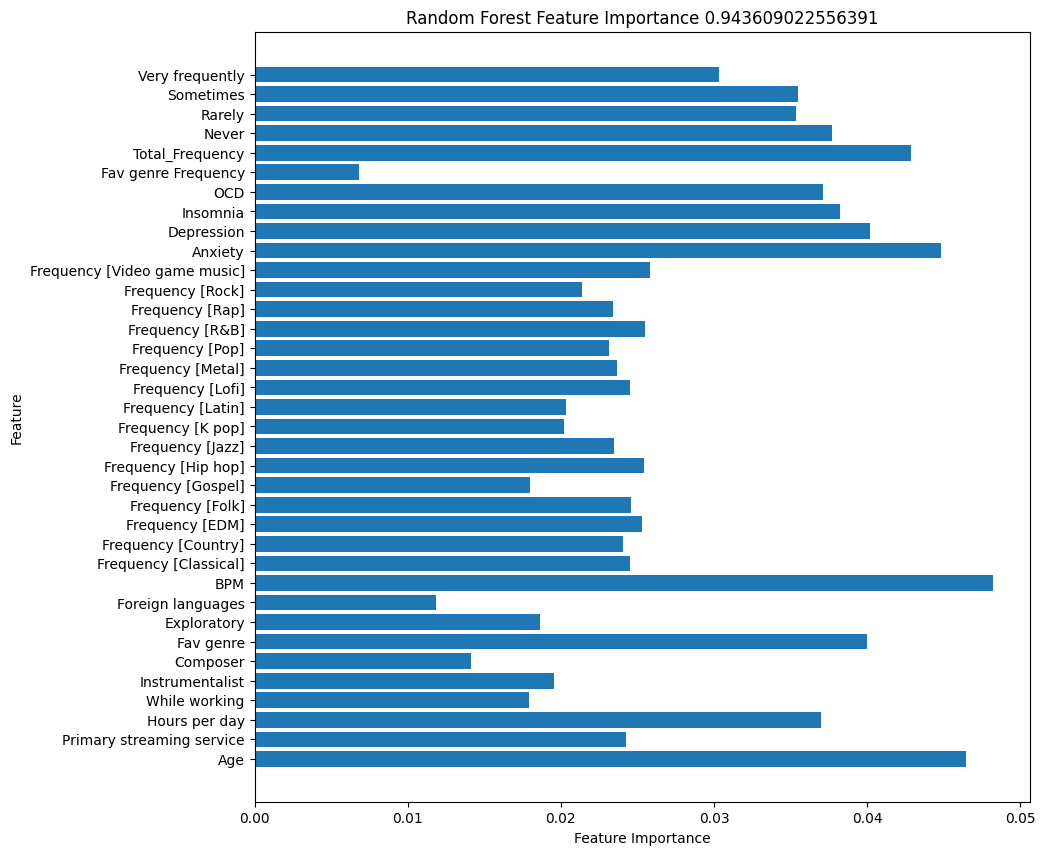

In [ ]:
feature_importance = random_forest_main.feature_importances_
feature_names = X.columns

# feature_importance.sort()

# Create a bar plot
plt.figure(figsize=(10, 10))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title(f'Random Forest Feature Importance {accuracy_score(y_test, pred_random_main)}')
plt.show()

In [ ]:
df_clean.drop(columns=frequencyCols).columns

Index(['Age', 'Primary streaming service', 'Hours per day', 'While working',
       'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory',
       'Foreign languages', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD',
       'Music effects', 'Improved', 'Fav genre Frequency', 'Total_Frequency',
       'Never', 'Rarely', 'Sometimes', 'Very frequently'],
      dtype='object')

In [ ]:
# @title Test Model { vertical-output: true }

# @markdown ###Personal Information
Age = 16 # @param {type:"number"}
Instrumentalist = 'Yes' # @param ["Yes","No"]
Composer = 'Yes' # @param ["Yes","No"]
# @markdown ---
#
# @markdown ###Mental Health
OCD = 0 # @param {type:"slider", min:0, max:10, step:1}
Anxiety = 0 # @param {type:"slider", min:0, max:10, step:1}
Depression = 0 # @param {type:"slider", min:0, max:10, step:1}
Insomnia = 0 # @param {type:"slider", min:0, max:10, step:1}
# Improved_by_Music = 'Improve' # @param ['No effect','Improve','Worsen']
# @markdown ---
#
# @markdown ###Listening Habits
While_working = 'Yes' # @param ["Yes","No"]
Exploratory = 'Yes' # @param ["Yes","No"]
Foreign_languages = 'Yes' # @param ["Yes","No"]
Hours_per_day = 0 # @param {type:"slider", min:0, max:24, step:0.5}
Primary_streaming_service = 'Spotify' # @param ['Spotify',  'Pandora',  'YouTube Music',  'I do not use a streaming service.',  'Apple Music',  'Other streaming service']
# @markdown ---
#
# @markdown ###Genre Informaion
Fav_genre = 'Latin' # @param ['Latin', 'Rock', 'Video game music', 'Jazz', 'R&B', 'K pop', 'Country', 'EDM', 'Hip hop', 'Pop', 'Rap', 'Classical', 'Metal', 'Folk', 'Lofi', 'Gospel']
BPM = 10 # @param {type:"number"}
# @markdown #####&nbsp;&nbsp;&nbsp;*Beats per minute of favourite genre*
#
# @markdown ---
Classical = 'Never' # @param ["Never", "Rarely", "Sometimes", "Very frequently"]
Country = 'Never' # @param ["Never", "Rarely", "Sometimes", "Very frequently"]
EDM = 'Never' # @param ["Never", "Rarely", "Sometimes", "Very frequently"]
Folk = 'Never' # @param ["Never", "Rarely", "Sometimes", "Very frequently"]
Gospel = 'Never' # @param ["Never", "Rarely", "Sometimes", "Very frequently"]
Hip_hop = 'Never' # @param ["Never", "Rarely", "Sometimes", "Very frequently"]
Jazz = 'Never' # @param ["Never", "Rarely", "Sometimes", "Very frequently"]
K_pop = 'Never' # @param ["Never", "Rarely", "Sometimes", "Very frequently"]
Latin = 'Very frequently' # @param ["Never", "Rarely", "Sometimes", "Very frequently"]
Lofi = 'Never' # @param ["Never", "Rarely", "Sometimes", "Very frequently"]
Metal = 'Never' # @param ["Never", "Rarely", "Sometimes", "Very frequently"]
Pop = 'Never' # @param ["Never", "Rarely", "Sometimes", "Very frequently"]
RnB = 'Never' # @param ["Never", "Rarely", "Sometimes", "Very frequently"]
Rap = 'Never' # @param ["Never", "Rarely", "Sometimes", "Very frequently"]
Rock = 'Never' # @param ["Never", "Rarely", "Sometimes", "Very frequently"]
Video_game_music = 'Never' # @param ["Never", "Rarely", "Sometimes", "Very frequently"]

#############
df_test = df_clean.copy().drop(df_clean.index)
test_data = [Age, Primary_streaming_service, Hours_per_day,
            While_working, Instrumentalist, Composer,
            Fav_genre, Exploratory, Foreign_languages,
            BPM, Classical, Country, EDM, Folk, Gospel,
            Hip_hop, Jazz, K_pop, Latin, Lofi, Metal, Pop,
            RnB, Rap, Rock, Video_game_music, Anxiety,
            Depression, Insomnia, OCD, '',0,
            '',0,0,0,0,0
            ]

df_test.loc[len(df_test)] = test_data

# df_test['Improved'] = df_test['Music effects'].map({'Worsen':0,'No effect':0,'Improve':1})
df_test.drop(columns=['Music effects','Improved'],inplace=True)

df_freqsum = pd.get_dummies(df_test[frequencyCols],prefix='',prefix_sep='')
df_freq_sum = df_freqsum.groupby(df_freqsum.columns, axis=1).sum()
df_test[df_freq_sum.columns] = df_freq_sum

for col in df_test[frequencyCols]:
  df_test[col] = df_test[col].map(frequency_mapping)

df_test['Fav genre Frequency'] = df_test[f'Frequency [{Fav_genre}]']

for col in df_test.select_dtypes('object'):
  df_test[col] = df_test[col].astype(df_clean[col].dtype)
  df_test[col] = df_test[col].cat.codes

df_test['Total_Frequency'] = df_test[frequencyCols].sum(axis=1)

prediction = random_forest_main.predict(df_test.values)[0]
result_list = ['NEUTRAL','POSITIVE']
print(f'I predict your listening habits will have a {result_list[prediction]} effect on your mental health.')

I predict your listening habits will have a POSITIVE effect on your mental health.
